# NSE TIME SERIES ANALYSIS

Group Members.
1. Brenda Mutai - Group Lead
2. Justin Mbugua
3. Sharon Momanyi
4. Stephen Munyiala

# Project Summary.
This project focuses on analyzing stock price movements across all publicly listed companies on the Nairobi Securities Exchange (NSE) over the years 2013 to 2024.

Using daily trading data — including prices, trading volume, Sector information — the project aims to provide actionable insights into market trends, stock performance, sector dynamics, and trading patterns.

The analysis aims to help investors, analysts, and researchers better understand market behavior and identify opportunities within the Kenyan stock market.

# Business Understanding
Investors and financial institutions operating on the Nairobi Securities Exchange (NSE) rely on precise information to make strategic decisions regarding stock trades. By forecasting future stock prices and identifying market trends, they can optimize investment strategies, improve portfolio management, and effectively mitigate risks. Such insights empower traders to seize profitable opportunities, avoid potential losses, and enhance overall financial stability.  
  
Additionally, predictive models enable investors to understand market behavior better, adapt to changing conditions, and maintain a competitive edge. With tools for analyzing historical trading data, stakeholders can uncover patterns, assess the impact of external factors like economic policies or global market shifts, and make data-driven choices that align with their financial goals. These advancements are essential for thriving in a dynamic stock market environment like the NSE.
#### Challenges faced today:
- Manual analysis of stock patterns is time-consuming.
- Investors react to market events after they occur, not proactively.
- Lack of predictive models tuned specifically for NSE stock behaviors (which may differ from US/EU markets).



## Objectives
Mainly to Develop time series models to forecast future stock prices.

1. To provide insights into which stocks might perform well based on historical trends and predictive models, which will allow for more informed decision-making.

2. To offer short-term predictions of stock prices or trends to support timely buy/sell decisions, potentially improving their profitability.

3. To develop a machine learning-based tool that provides predictive insights and visualizations for NSE market trends.

## Stakeholders
1. Individual Investors: People who are actively trading or considering investments in NSE-listed companies.

2. Institutional Investors: Investment funds, banks, and pension funds looking for more structured insights into the market.

3. Stockbrokers and Analysts: Professionals who rely on historical data to guide their clients and make informed decisions.

4. NSE and Regulatory Bodies: The NSE itself and regulatory authorities that track market health and performance, using tools for market surveillance and risk assessment.

5. Financial Advisors: Professionals who can use predictive insights to guide client portfolios.

## Data Understanding.
The data is a compilation of historical daily stock market price data relates to the Kenyan Nairobi Securities Exchange (NSE) for 2013 and 2024. It was sourced from https://data.mendeley.com/(Kenya Nairobi Securities Exchange (NSE) All Stocks Prices 2013-2024)

The data was scrapped from a publicly accessible website (http://live.mystocks.co.ke/) licensed by NSE by exporting raw web data to spreadsheets, then cleaned  up to a final CSV.

Each stock data row has 13 data columns (1)Date (2)Stock Code (3)Stock Name (4)12-month Low price (5)12-month High price (6)Day's Low price (7)Day's High price (8)Day's Final Price (9)Previous traded price (10)Change in price value (11)Change in price % (12)Volume traded (13)Adjusted price.  One additional CSV file is also provided to show the stocks market sector, with 3 columns as: (1)Market sector (2)Stock Code (3)Stock Name.

## Metric of success.
1. Model Performance: Accuracy of stock price forecasts measured by metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), or Mean Square Error (MSE).
2. Insight Utility: The relevance and actionability of the identified market trends, sector performance analyses, and trading patterns for stakeholder decision-making (Qualitative).
3. Completeness: Successful analysis covering the specified timeframe (2013-2024) and scope (all listed companies, key data points).

## 1. Dataset loading.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import xgboost as xgb
import joblib
import os


In [2]:
# Loading the data
data_2013 = pd.read_csv('NSE_data_all_stocks_2013.csv')
data_2014 = pd.read_csv('NSE_data_all_stocks_2014.csv')
data_2015 = pd.read_csv('NSE_data_all_stocks_2015.csv')
data_2016 = pd.read_csv('NSE_data_all_stocks_2016.csv')
data_2017 = pd.read_csv('NSE_data_all_stocks_2017.csv')
data_2018 = pd.read_csv('NSE_data_all_stocks_2018.csv')
data_2019 = pd.read_csv('NSE_data_all_stocks_2019.csv')
data_2020 = pd.read_csv('NSE_data_all_stocks_2020.csv')
data_2021 = pd.read_csv('NSE_data_all_stocks_2021.csv')
data_2022 = pd.read_csv('NSE_data_all_stocks_2022.csv')
data_2023 = pd.read_csv('NSE_data_all_stocks_2023.csv')
data_2024 = pd.read_csv('NSE_data_all_stocks_2024.csv')

In [3]:
sectors = pd.read_csv('NSE_data_stock_market_sectors_2023_2024.csv')

In [4]:
all_df = [data_2013, data_2014, data_2015, data_2016, data_2017, data_2018,
           data_2019, data_2020, data_2021, data_2022, data_2023, data_2024]

Since the dataset have been loaded, they have the same features just different names. So we worked on making them have similarity for easy merging and use in the project.

In [5]:
for i in range(len(all_df)):
    all_df[i].columns = all_df[i].columns.str.strip()
    all_df[i].rename(columns = {'DATE': 'Date', 'CODE': 'Code', 'NAME': 'Name', 'Adjust': 'Adjusted Price'}, inplace = True)

In [6]:
data_2013

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,-,-,-,-
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.5,6.25%,300,-
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,-,-,-,59
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,-,-,-,215
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.2,1.71%,"14,500",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14884,31-Dec-13,SCOM,Safaricom Plc,23.5,33.5,10.8,10.95,10.85,10.85,-,-,"2,461,000",-
14885,31-Dec-13,^FNK15,FTSE NSE Kenya 15 Index,154.41,227.73,172.4,172.4,172.4,172.84,-0.44,0.25%,-,-
14886,31-Dec-13,^FNK25,FTSE NSE Kenya 25 Index,162.87,238.71,174.27,174.27,174.27,174.56,-0.29,0.17%,-,-
14887,31-Dec-13,^N20I,NSE 20-Share Index,"1,873.47","2,766.77","4,926.97","4,926.97","4,926.97","4,874.29",52.68,1.08%,-,-


In [7]:
# Merging the data files
nse_data = pd.concat([data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019,
                       data_2020, data_2021, data_2022, data_2023, data_2024], ignore_index = True)

In [8]:
nse_data = nse_data.merge(sectors, left_on = 'Code', right_on = 'Stock_code', how = 'left')
nse_data.drop(columns = ['Stock_code','Stock_name'], axis = 1, inplace = True)

Since all the NSE data and the respective sectors is loaded in different data frames, we need to merge it into a single dataframe.

In [9]:
nse_data

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,-,-,-,-,Agricultural
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.5,6.25%,300,-,Agricultural
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,-,-,-,59,Agricultural
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,-,-,-,215,Agricultural
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.2,1.71%,"14,500",-,Agricultural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204382,31-Dec-24,^N25I,NSE 25-Share Index,2364.29,"3,457.87","3,402.80","3,402.80","3,402.80","3,380.24",22.56,0.67%,-,-,Indices
204383,31-Dec-24,^NASI,NSE All-Share Index,90.1,125.34,123.48,123.48,123.48,123.12,0.36,0.29%,-,-,Indices
204384,31-Dec-24,^NBDI,NSE Bonds Index,986.46,"1,108.71","1,107.41","1,107.41","1,107.41","1,093.87",13.54,1.24%,-,-,NaN
204385,31-Dec-24,^ZKEQTK,Zamara Kenya Equity Index (KES),1535.23,"2,547.58","2,519.80","2,519.80","2,519.80","2,495.28",24.52,0.98%,-,-,Indices


## 2. Data Cleaning.

The data appears to have several missing values. Next we check for the dataframe information to find out how many missing values are in each column. This is important when deciding how we'll deal with the missing values.

In [10]:
nse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204387 entries, 0 to 204386
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            204385 non-null  object
 1   Code            204385 non-null  object
 2   Name            204385 non-null  object
 3   12m Low         204385 non-null  object
 4   12m High        204385 non-null  object
 5   Day Low         204385 non-null  object
 6   Day High        204385 non-null  object
 7   Day Price       204385 non-null  object
 8   Previous        204385 non-null  object
 9   Change          204385 non-null  object
 10  Change%         204385 non-null  object
 11  Volume          204385 non-null  object
 12  Adjusted Price  204385 non-null  object
 13  Sector          196499 non-null  object
dtypes: object(14)
memory usage: 21.8+ MB


In [11]:
# Checking for null values
nse_data.isnull().sum()

Date                 2
Code                 2
Name                 2
12m Low              2
12m High             2
Day Low              2
Day High             2
Day Price            2
Previous             2
Change               2
Change%              2
Volume               2
Adjusted Price       2
Sector            7888
dtype: int64

The empty values are not interpreted as missing values because they are currently represented as '-'. We'll first have to change this to NaN to see how many values are missing.

In [12]:
# Replace '-' with NaN
nse_data.replace('-', pd.NA, inplace = True)
nse_data.isnull().sum()

Date                   2
Code                   2
Name                   2
12m Low                2
12m High               2
Day Low               35
Day High              35
Day Price              3
Previous               7
Change             76427
Change%            76507
Volume             61826
Adjusted Price    187374
Sector              7888
dtype: int64

To prepare the numeric columns for analysis, we first need to clean them by removing any commas and spaces before converting them to numeric.

In [13]:
# Columns to exclude from numeric cleaning
exclude_cols = ['Code', 'Name', 'Sector', 'Date', 'Change%']

# Clean all other columns
for col in nse_data.columns:
    if nse_data[col].dtype == 'object' and col not in exclude_cols:
        nse_data[col] = nse_data[col].str.replace(',', '')
        nse_data[col] = pd.to_numeric(nse_data[col], errors = 'coerce')

# Remove the '%' sign and convert Change% to numeric
nse_data['Change%'] = nse_data['Change%'].str.replace('%', '', regex = False)
nse_data['Change%'] = pd.to_numeric(nse_data['Change%'], errors = 'coerce')

In [14]:
# Convert numeric columns
num_cols = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Volume', 'Change']
nse_data[num_cols] = nse_data[num_cols].apply(pd.to_numeric, errors = 'coerce')

In [15]:
# Rechecking for null values
nse_data.isnull().sum()

Date                   2
Code                   2
Name                   2
12m Low                2
12m High               2
Day Low               35
Day High              35
Day Price              3
Previous               7
Change             76427
Change%            76507
Volume             61826
Adjusted Price    187374
Sector              7888
dtype: int64

Now the missing values are correctly interpreted and the columns with numeric values have been converted successfully. We also have to change the date from string format to datetime. Since the dates in the dataset has the day first while the dates in other datasets has the month first, we'll use a function that accounts for this.

In [16]:
# Converting to datetime
def safe_parse_date(date_str):
    try:
        if '2023' in date_str:
            return pd.to_datetime(date_str, dayfirst = True)
        else:
            return pd.to_datetime(date_str, dayfirst = False)
        # else:
        #     return pd.to_datetime(date_str, dayfirst = True)
    except:
        return pd.NaT

# Apply the function
nse_data['Date'] = nse_data['Date'].apply(safe_parse_date)

In [17]:
# Recheck missing values
nse_data.isnull().sum()

Date                   2
Code                   2
Name                   2
12m Low                2
12m High               2
Day Low               35
Day High              35
Day Price              3
Previous               7
Change             76427
Change%            76507
Volume             61826
Adjusted Price    187374
Sector              7888
dtype: int64

In [18]:
nse_data[nse_data['Day Price'].isnull()]

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,Sector
30584,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98402,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112988,2019-10-16,MSC,Mumias Sugar Company Ltd,0.27,0.39,NaN,NaN,NaN,0.28,0.28,NaN,5400.0,NaN,Manufacturing and Allied


All values in the 'Date' column have been successfully converted to datetime format. Now we can deal with missing values. We'll do this by:
- Dropping the **Adjusted Price** column.
- Replacing the missing values in the **Sector** column with 'Unknown'.
- Dropping missing values from the columns with a small number of missing values.
- Filling the missing values in the **Change** and **Change%** columns by calculating the values.
- Replacing the missing values in the **Volume** column with the median for each stock.

In [19]:
# Drop adjusted price column
nse_data.drop('Adjusted Price', axis = 1, inplace = True)

nse_data = nse_data[~nse_data['Sector'].isna()]

# Dropping rows with missing values from the 'Previous' column
nse_data = nse_data.dropna(subset = ['Date', 'Code', 'Name', '12m Low', '12m High',
                                      'Day Low', 'Day High', 'Day Price', 'Previous']).reset_index()

# Filling missing values for change and change%
nse_data['Change'] = nse_data['Change'].fillna(nse_data['Day Price'] - nse_data['Previous'])
nse_data['Change%'] = nse_data['Change%'].fillna((nse_data['Change'] / nse_data['Previous']) * 100)

In [20]:
# Replacing the missing values in the 'Volume' column with the median for each stock.
nse_data['Volume'] = nse_data.groupby('Code')['Volume'].transform(lambda x: x.fillna(x.median()))

In [21]:
missing_volume_stocks = nse_data[nse_data['Volume'].isna()]['Code'].unique()

# Then, filter out those stocks
nse_data = nse_data[~nse_data['Code'].isin(missing_volume_stocks)].reset_index(drop = True)

print("Remaining missing Volume values:", nse_data['Volume'].isna().sum())
print("Remaining rows:", nse_data.shape[0])

Remaining missing Volume values: 0
Remaining rows: 185336


In [22]:
#Rechecking the missing value.
nse_data.isnull().sum()

index        0
Date         0
Code         0
Name         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Sector       0
dtype: int64

**Checking for outliers.**
Checking for outliers is also important to get more information about the dataset. We won't remove these outliers because financial data is volatile by nature so outliers are common and therefore most outliers are natural market behaviour rather than errors.

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

num_cols = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price', 'Previous', 'Change', 'Volume']

# Applying the function to numerical columns
for col in num_cols:
    outliers = detect_outliers_iqr(nse_data, col)
    print(f'{col}: {len(outliers)} outliers')

12m Low: 29024 outliers
12m High: 26489 outliers
Day Low: 28878 outliers
Day High: 28765 outliers
Day Price: 28985 outliers
Previous: 28984 outliers
Change: 58626 outliers
Volume: 31106 outliers


Outlier Report:
Stock prices, particularly intraday highs, lows, and trading volume, tend to be highly volatile. Sharp price movements (reflected as "Change") and sudden surges in volume frequently occur during major market events, news releases, or heightened trading activity. While these may appear as statistical outliers, they often carry valuable signals for predictive modeling.

The fact that the "Change" feature has the most "outliers" (58,626) is especially significant. Price fluctuations typically exhibit heavy-tailed behavior, meaning extreme values occur more frequently than they would in a normal distribution. These large price movements,labeled as outliers,are often precisely what prediction models aim to capture, not eliminate.


## 3. Exploratory Data Analysis.

### 3.1 Univariate Analysis

In [24]:
nse_data.describe()

,index,Date,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume
count,185336.000000,185336,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,185336.000000,1.853360e+05
mean,102197.114624,2019-02-23 04:29:43.916777984,77.706750,104.760663,102.405636,103.172996,102.740522,102.726074,0.014448,1.471060,4.295915e+05
min,0.000000,2013-01-02 00:00:00,0.160000,0.230000,0.160000,0.170000,0.160000,0.160000,-250.000000,0.000000,1.000000e+02
25%,50471.750000,2016-03-16 00:00:00,3.400000,4.900000,5.500000,5.500000,5.500000,5.500000,-0.050000,0.000000,9.000000e+02
50%,102142.500000,2019-03-14 00:00:00,10.500000,17.000000,17.000000,17.500000,17.150000,17.150000,0.000000,0.490000,6.500000e+03
75%,154258.250000,2022-02-15 00:00:00,30.500000,55.500000,58.000000,59.000000,58.000000,58.000000,0.050000,1.940000,6.900000e+04
max,204379.000000,2024-12-31 00:00:00,2625.000000,3330.000000,3330.000000,3330.000000,3330.000000,3330.000000,1438.250000,2329.150000,2.084859e+08
std,59301.622509,NaN,264.078811,316.057413,283.840937,284.128126,283.997636,283.901127,4.971757,6.080054,2.648595e+06


The min and max values for 12m High, Day Low, Day High, Day Price, and Previous are consistent, generally falling within similar ranges. It's good to see that Day Low values are consistently less than or equal to Day High values (as indicated by the min/max ranges and quantiles).

For 12m Low, 12m High, Day Low, Day High, Day Price, and Previous, the mean is noticeably higher than the 50% (median) for most of them (e.g., Day Price mean: 102.74, median: 17.15). This indicates a strong positive skewness in the distribution of these price features. This means there are a greater number of lower-priced stocks, and a long tail extending to higher-priced stocks.

All the numerical features, especially 'Change', 'Change%', and 'Volume', exhibit severe positive (and for 'Change', also negative) skewness and heavy tails. This is normal for financial market data.

### Distribution of Numerical Columns

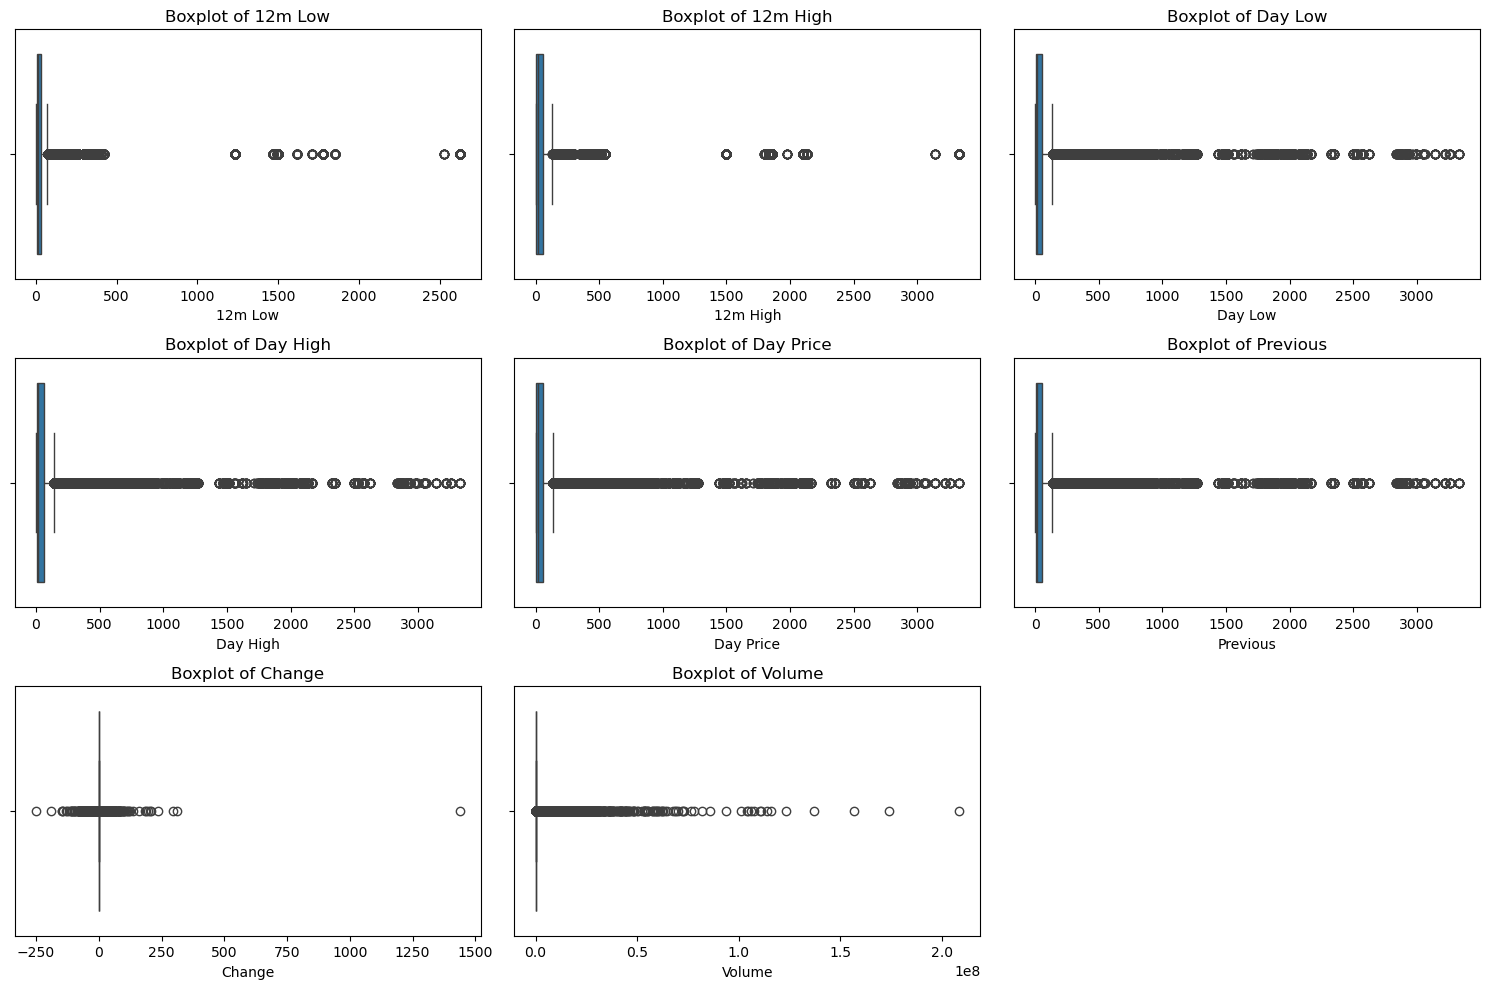

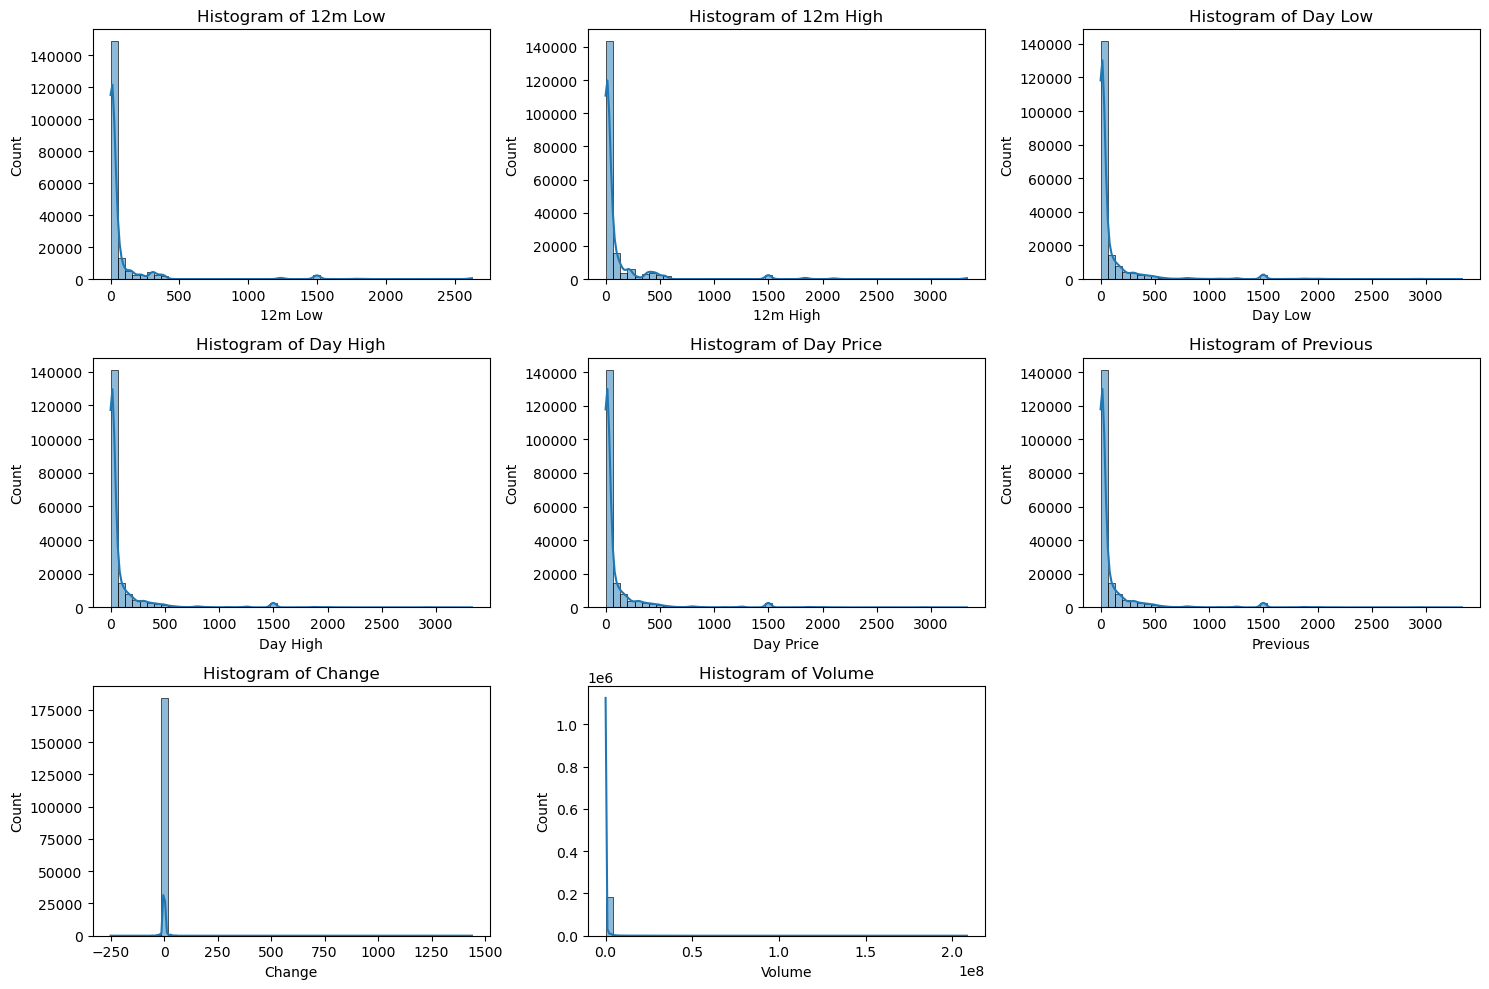

In [25]:
plt.figure(figsize = (15, 10))

# Boxplot for each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = nse_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Histogram for each numerical column
plt.figure(figsize = (15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(nse_data[col], kde = True, bins = 50)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


While the bulk of the data is at the lower end, there's a long tail extending towards higher values (up to approximately 2500 for "12m Low" and over 3000 for "12m High" and "Day Low"). This signifies that a smaller number of instances have significantly higher values for these metrics.

Each histogram is heavily skewed to the right. The overwhelming majority of the data points are concentrated at very low values (close to 0), with counts often exceeding 120,000 to 140,000. This indicates that for most observations, the "Day High," "Day Price," and "Previous" values are very low.

"Change" Feature: This feature is highly concentrated around zero, implying frequent periods of little to no price movement. While generally symmetrical, it exhibits a noticeable right tail, indicating that large positive changes are more common than large negative ones within the observed range.

"Volume" Feature: This feature is characterized by extreme right-skewness, with the vast majority of observations having very low volumes and a few instances of extremely high volumes. This kind of distribution is typical of count data or phenomena where a large number of events are small, and a few are very large.

### 3.2 Bivariate Analysis.

#### Top 10 Stocks by Volume and Price Change

Top 10 stocks by total volume:
Code
SCOM    2.959450e+10
LAPR    1.252750e+10
EQTY    6.770691e+09
KCB     5.392578e+09
HBE     2.486856e+09
COOP    2.483624e+09
ABSA    2.079048e+09
KPLC    2.029433e+09
KEGN    1.962444e+09
MSC     1.749560e+09
Name: Volume, dtype: float64
Top 10 stocks by total price change:
Code
EVRD    8461.50
UCHM    7883.35
SMER    7651.54
OCH     7552.21
TCL     7407.08
HAFR    7328.09
FTGH    6653.78
LBTY    6613.74
LKL     6568.93
CABL    6502.93
Name: Change%, dtype: float64


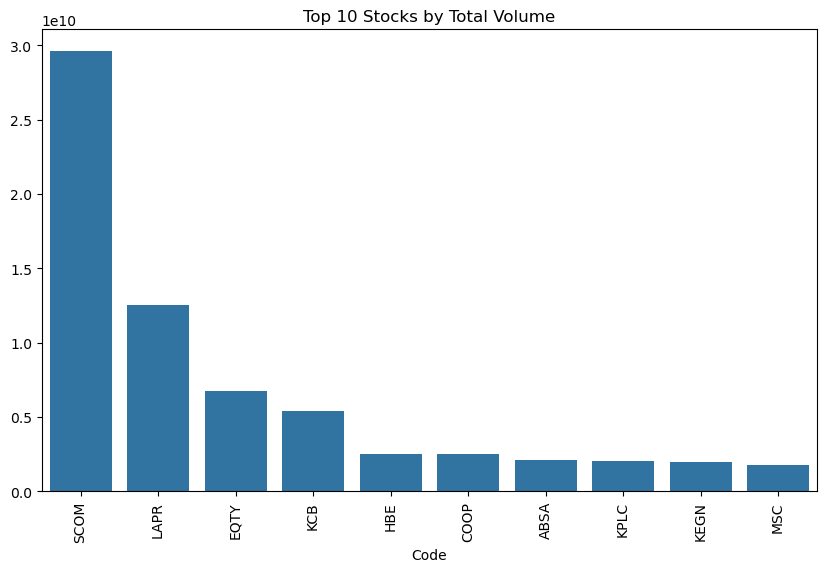

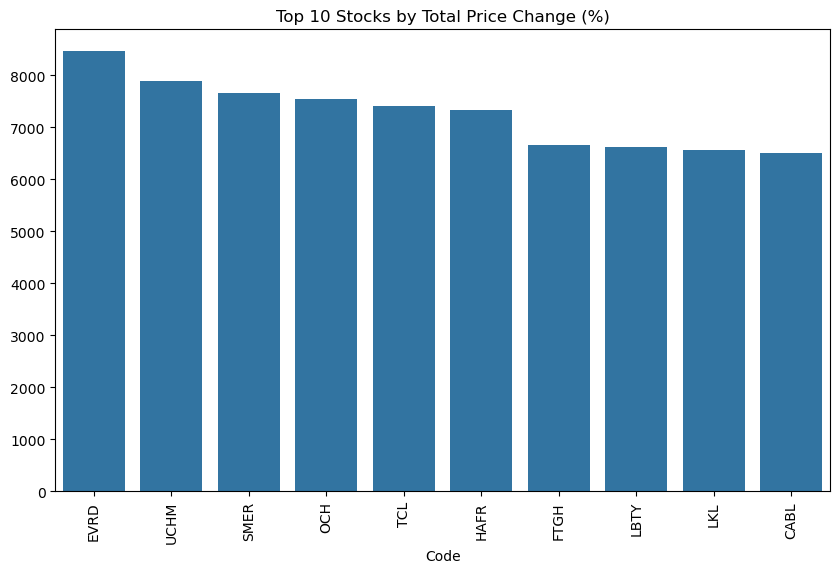

In [26]:
top_volume_stocks = nse_data.groupby('Code')['Volume'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 stocks by total volume:\n{top_volume_stocks}")
plt.figure(figsize = (10, 6))
sns.barplot(x = top_volume_stocks.index, y = top_volume_stocks.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Stocks by Total Volume')

# Top 10 stocks by price change (Change%)
top_change_stocks = nse_data.groupby('Code')['Change%'].sum().sort_values(ascending = False).head(10)
print(f"Top 10 stocks by total price change:\n{top_change_stocks}")
plt.figure(figsize = (10, 6))
sns.barplot(x = top_change_stocks.index, y = top_change_stocks.values)
plt.xticks(rotation = 90)
plt.title('Top 10 Stocks by Total Price Change (%)')
plt.show()

The most striking observation is the overwhelming dominance of the stock SCOM. Its total volume is approximately 2.9 x 10¹⁰ (29 billion), which is more than double the volume of the second-ranked stock, LAPR (approximately 1.2 x 10¹⁰ or 12 billion).
This indicates a highly concentrated trading activity, with SCOM being an exceptionally liquid or actively traded stock compared to all others in the top 10.

Significant Drop-off: There's a steep decline in total volume after "SCOM" and "LAPR."



All stocks in the top 10 list show incredibly high positive price changes, indicating significant appreciation over the period analyzed. The lowest change among these top performers is approximately 6,500%, while the highest approaches 8,300%.

"EVRD" is the top performer, registering a total price change of roughly 8,300%.

There is a relatively close clustering of performance among the top few stocks. "UCHM," "SMER," "OCH," "TCL," and "HAFR" all exhibit price changes in the range of 7,300% to 7,900%, showing strong and comparable growth.

#### Sector Performance

Analysis will involve checking for which sectors have the highest total volume traded and which ones have the highest average price change. This will help in understanding which sectors are the most popular in the NSE as well as how volatile each sector is.

Total volume by sector:
Sector
Telecommunication              4.212336e+10
Banking                        1.855745e+10
Construction and Allied        5.253647e+09
Commercial and Services        4.603678e+09
Insurance                      4.134705e+09
Manufacturing and Allied       2.988082e+09
Investment                     1.527958e+09
Investment Services            3.118618e+08
Agricultural                   1.108250e+08
Automobiles and Accessories    7.211700e+06
Name: Volume, dtype: float64
Average price change by sector:
Sector
Commercial and Services        2.008086
Investment                     2.004850
Investment Services            1.709207
Insurance                      1.656314
Automobiles and Accessories    1.540956
Manufacturing and Allied       1.322894
Construction and Allied        1.225254
Agricultural                   1.214713
Banking                        1.171780
Telecommunication              0.683685
Name: Change%, dtype: float64


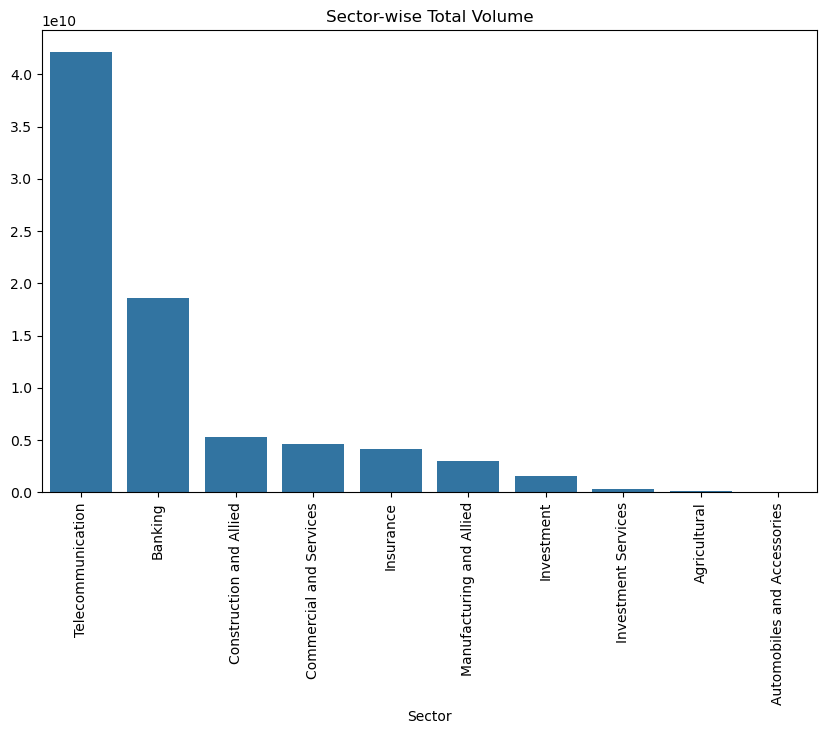

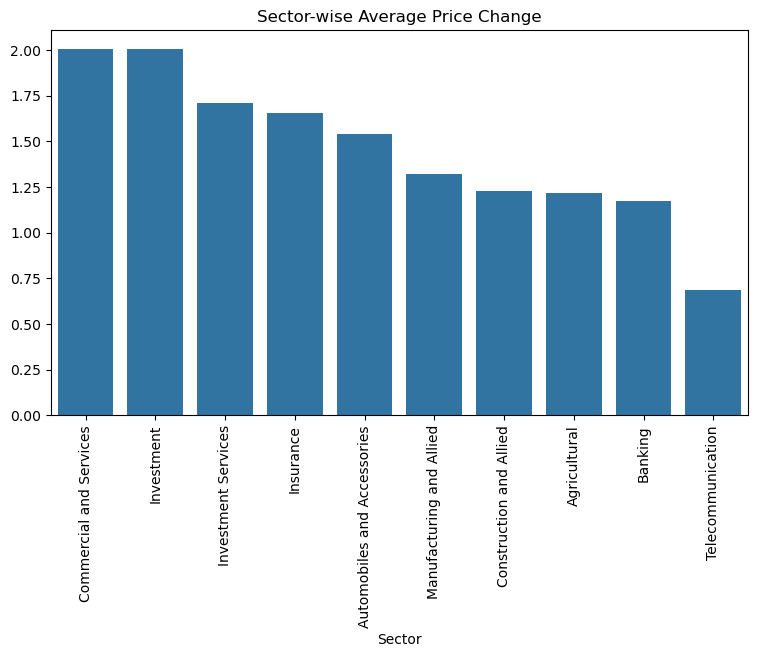

In [27]:
sector_volume = nse_data.groupby('Sector')['Volume'].sum().sort_values(ascending = False)
print(f"Total volume by sector:\n{sector_volume}")

# Calculating average price change by sector
sector_change = nse_data.groupby('Sector')['Change%'].mean().sort_values(ascending = False)
print(f"Average price change by sector:\n{sector_change}")

# Sector volume
plt.figure(figsize = (10, 6))
sns.barplot(x = sector_volume.index, y = sector_volume.values)
plt.xticks(rotation = 90)
plt.title('Sector-wise Total Volume')
plt.show()

# Sector average price change
plt.figure(figsize = (9, 5))
sns.barplot(x = sector_change.index, y = sector_change.values)
plt.xticks(rotation = 90)
plt.title('Sector-wise Average Price Change')
plt.show()

Telecommunication Dominance: The Telecommunication sector exhibits an overwhelmingly high total trading volume, reaching approximately 42 billion units. This volume is more than double that of the next highest sector.

Banking Sector's Significance: The Banking sector secures the second position with a substantial total volume of about 18.5 billion units, highlighting its considerable market activity.

The "Investment," "Investment Services," "Agricultural," and "Automobiles and Accessories" sectors show significantly lower trading volumes, ranging from about 1.5 billion down to just 0.2 billion, indicating relatively less market activity in these areas.

Market liquidity and investor interest are highly concentrated within a few key sectors.

The "Commercial and Services" and "Investment" sectors demonstrate the highest average price change, both registering approximately 2.0 units. This indicates strong positive performance on average within these sectors.

Sectors such as "Investment Services," "Insurance," "Automobiles and Accessories," and "Manufacturing and Allied" show moderate average price changes, ranging from roughly 1.7 down to 1.3.

Conversely, the "Telecommunication" sector shows the weakest average price change. This differentiation highlights the diverse dynamics and investment opportunities or risks present across different market sectors.

#### Price and Volume Trends Over Time

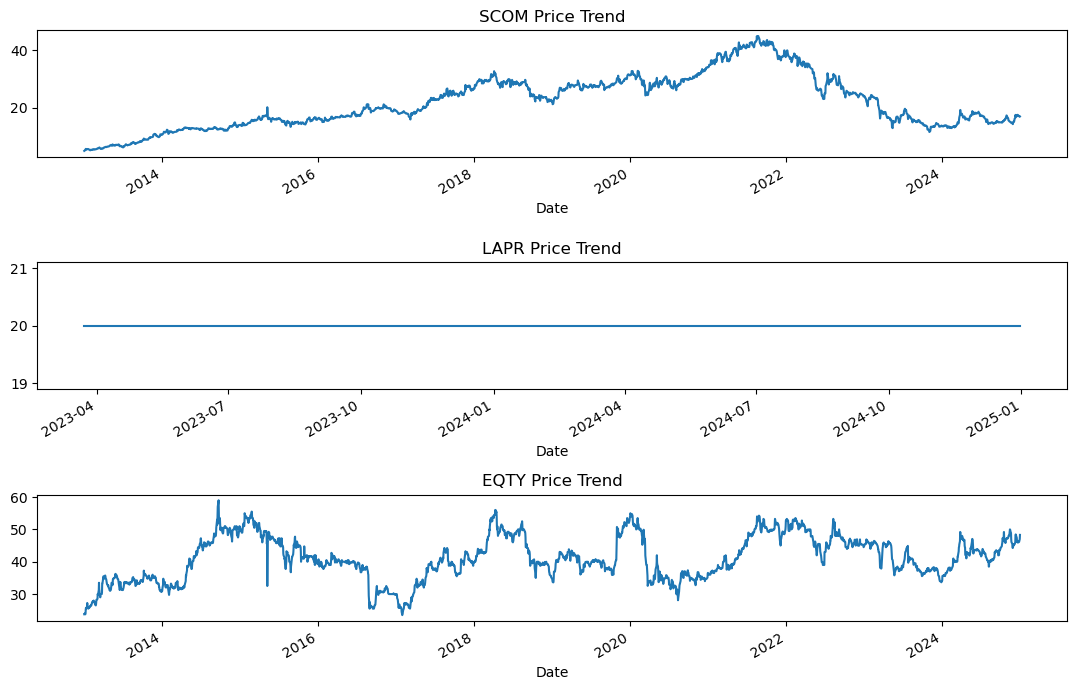

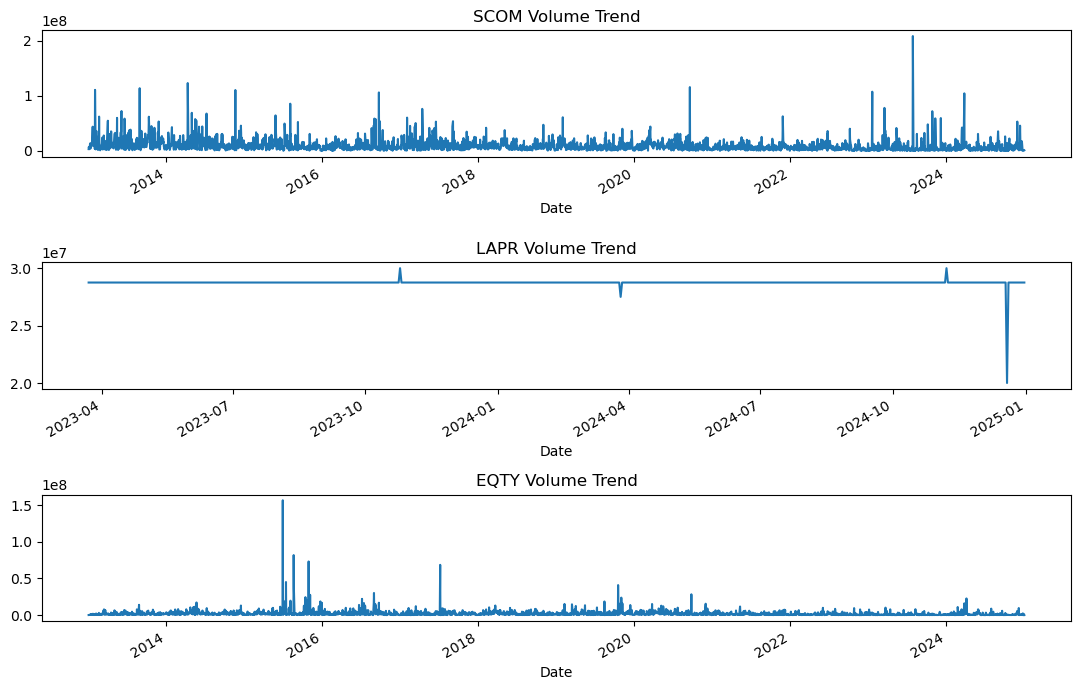

In [28]:
# Plotting the price trends for top 3 stocks by volume
sample_stocks = top_volume_stocks.index[:3]

plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Day Price'].plot(title = f'{stock} Price Trend')
plt.tight_layout()
plt.show()

# Volume trends for top 3 stocks
plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Volume'].plot(title = f'{stock} Volume Trend')
plt.tight_layout()
plt.show()

Long-term Growth & Correction: From early 2013, SCOM experienced a steady and significant upward price trend, peaking around mid-2022 at approximately 42 units.
The stock has shown considerable volatility, particularly during its growth phase and subsequent decline.

Over the period shown (early 2023 to early 2025), LAPR's price trend is remarkably flat, consistently holding at approximately 20 units. This extreme stability suggests either very low trading activity, a fixed pricing mechanism

EQTY's price trend over the period from early 2013 to early 2025 is characterized by high volatility and cyclical patterns. The price fluctuates significantly, generally within a range of 30 to 60 units.

Consistent Activity with Spikes:SCOM over the period from early 2013 to early 2025, SCOM generally maintains a baseline trading volume, but it is frequently punctuated by notable and sometimes very significant spikes in volume. These spikes indicate bursts of intense trading activity.

From early 2023 to early 2025, LAPR exhibits an unusually flat and stable trading volume, consistently hovering around 2.8 x 10⁷ units for most of the period.

EQTY's volume trend from early 2013 to early 2025 shows a generally lower average trading volume compared to SCOM, but it also experiences significant, albeit less frequent, spikes.

#### Top 3 Price change trend.

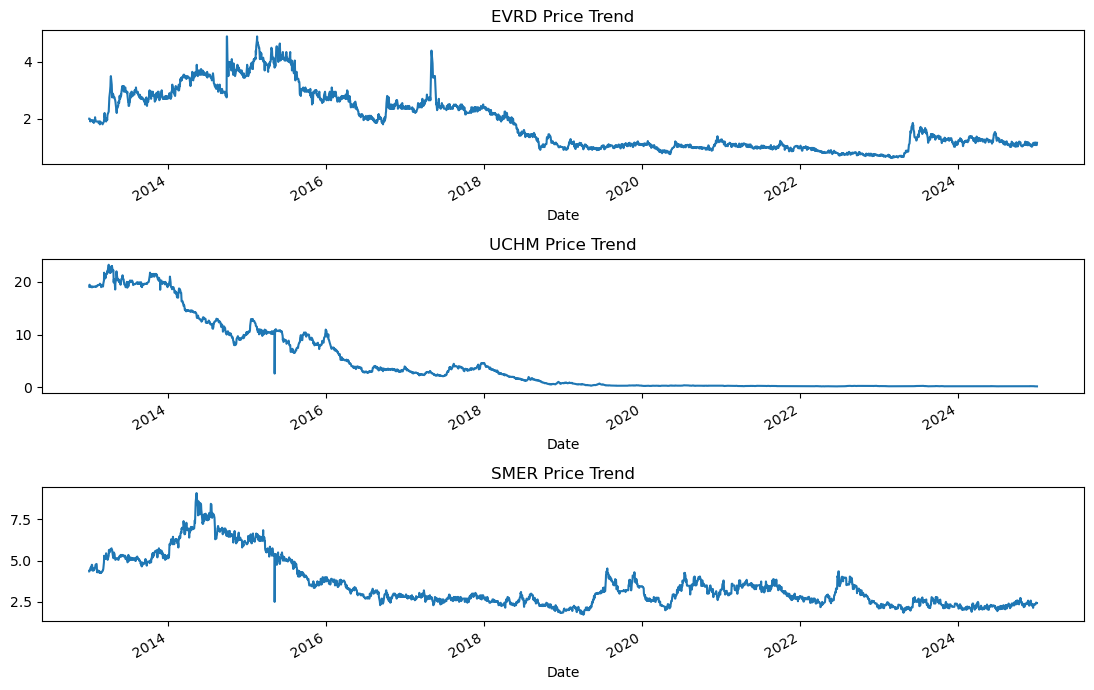

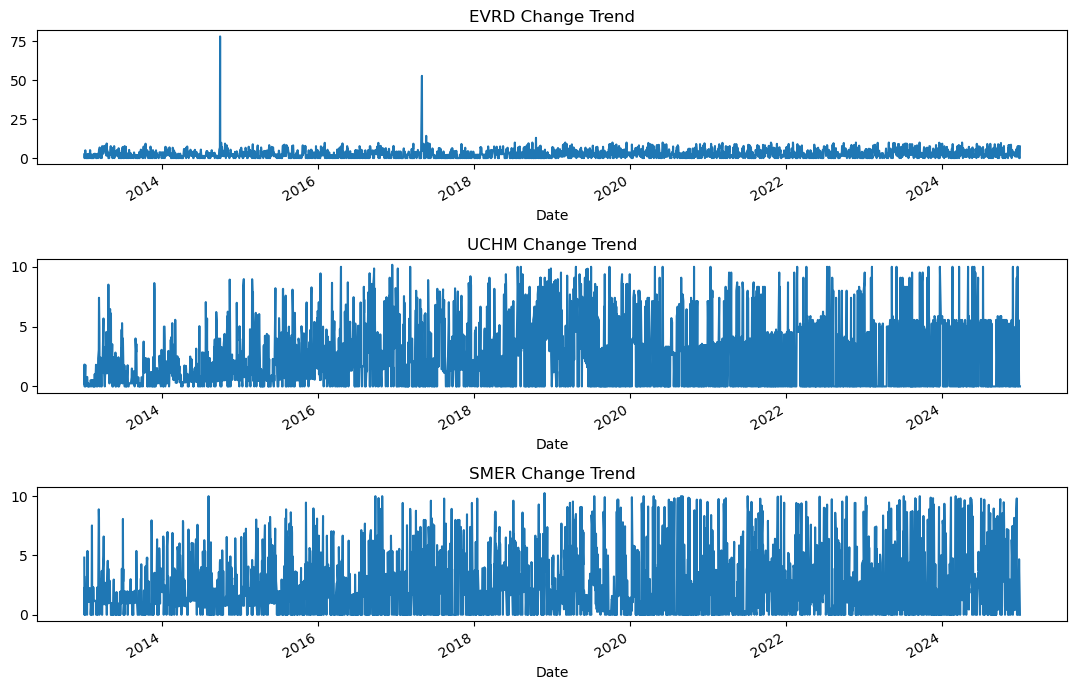

In [29]:
# Plotting the price trends for top 3 by change
sample_stocks = top_change_stocks.index[:3]

plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Day Price'].plot(title = f'{stock} Price Trend')
plt.tight_layout()
plt.show()

# Volume trends for top 3 stocks
plt.figure(figsize = (11, 7))
for i, stock in enumerate(sample_stocks, 1):
    plt.subplot(3, 1, i)
    stock_data = nse_data[nse_data['Code'] == stock].sort_values(by = 'Date')
    stock_data.set_index('Date')['Change%'].plot(title = f'{stock} Change Trend')
plt.tight_layout()
plt.show()

EVRD experienced a strong upward trend from 2013, peaking around mid-2015 at approximately 4.5 units. Subsequently, it embarked on a prolonged downward trend, with intermittent recoveries, settling at a much lower price level, fluctuating between 1.0 and 2.5 units for most of the later period.

UCHM shows a stark and consistent downtrend following an initial peak of over 20 units in early 2014. The price experienced a sharp decline, falling below 1.0 unit by late 2018.

SMER reached a peak of approximately 8.0 units in late 2014, followed by a substantial decline to around 2.5 units by mid-2016.

EVRD's daily price changes are typically small, mostly fluctuating between 0 and 10 units. However, the stock is prone to rare but significant positive spikes, with "Change" values reaching up to approximately 75 units. These sharp spikes indicate isolated periods of very large price movements.

UCHM experiences considerable price movement on a day-to-day basis. Given its previously observed long-term price decline, this implies significant daily absolute changes, regardless of direction.

SMER also undergoes significant price movements on a regular daily basis, indicative of a highly active and volatile trading environment.

#### Day Price trend over Time.

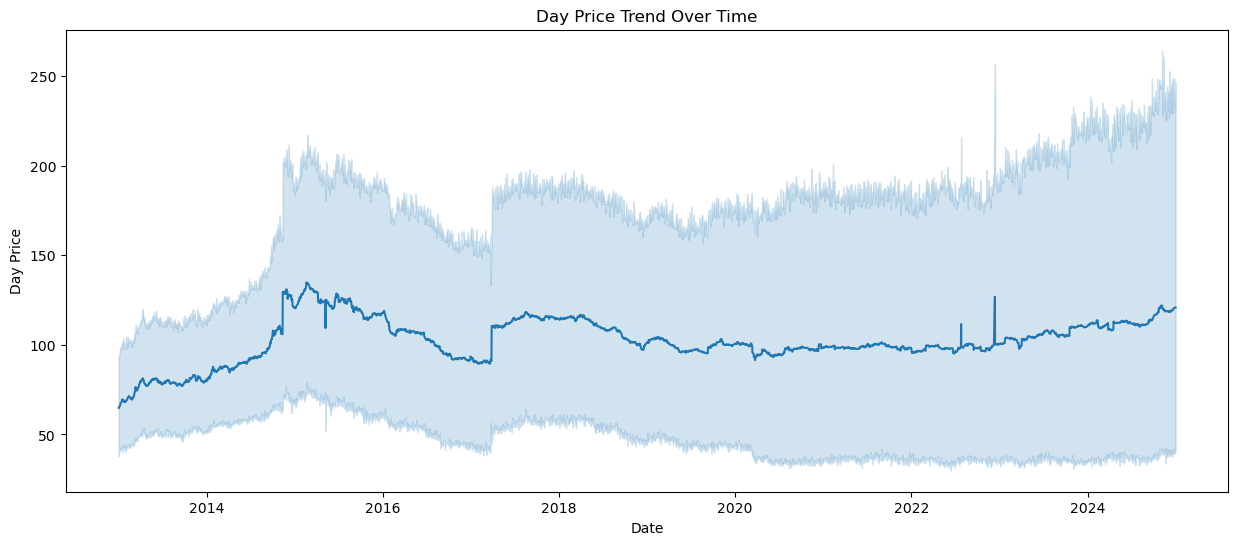

In [30]:
#Day price trend
plt.figure(figsize = (15, 6))
sns.lineplot(x = 'Date', y = 'Day Price', data = nse_data)
plt.title('Day Price Trend Over Time')
plt.show()

Initial Growth and Subsequent Decline (2013-2017): The "Day Price" showed a strong upward trend from early 2013, peaking around mid-2015 with prices reaching approximately 130 units on average. Following this peak, there was a noticeable decline until mid-2017, where the average price settled around 90 units.

Period of Relative Stability with Fluctuations (2017-2023): From mid-2017 to mid-2023, the average "Day Price" entered a phase of relative stability, generally fluctuating within a band of approximately 90 to 120 units. While stable, there were noticeable short-term price spikes within this period, indicating occasional bursts of higher average prices.

Recent Uptick (2023-2025): From mid-2023 onwards to early 2025, there appears to be a moderate upward trend, with the average 
price rising from around 100 to 120 units.



#### Cumulative Change Percentage.

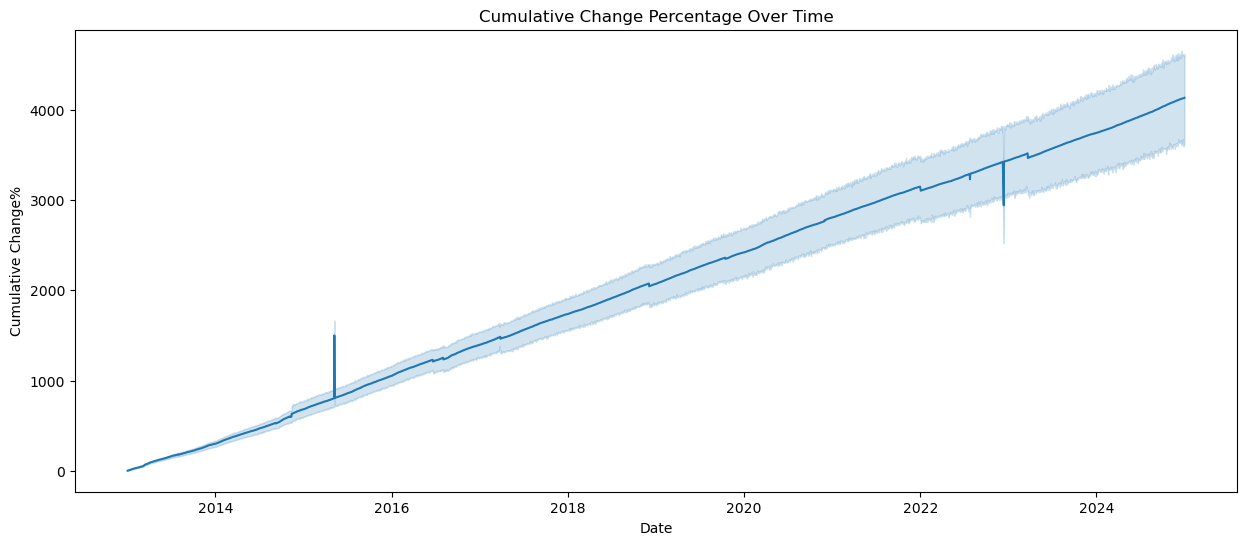

In [31]:
#Cumulative Change%.
nse_data['Cumulative Change%'] = nse_data.groupby('Code')['Change%'].cumsum()
plt.figure(figsize = (15, 6))
sns.lineplot(x = 'Date', y = 'Cumulative Change%', data = nse_data)
plt.title('Cumulative Change Percentage Over Time')
plt.show()

Consistent Upward Trend: The cumulative change percentage shows a remarkably consistent and strong upward trend throughout the entire period. Starting near 0% in early 2013, it steadily climbs to reach over 4000% by early 2025. This indicates a sustained period of positive cumulative growth.

Steady Rate of Change: The slope of the main trend line appears relatively constant, suggesting a fairly steady rate of positive cumulative change over the long term, rather than periods of accelerating or decelerating growth.

While the overall trend is smooth, two distinct periods show a temporary sharp increase in the main trend line and a wider spread in the shaded area: one around late 2015 / early 2016 and another around late 2022 / early 2023. These could represent periods of accelerated growth or increased volatility.

A robust and sustained long-term positive cumulative change, indicating consistent overall growth over the past decade.

#### Relative Strength over Time.

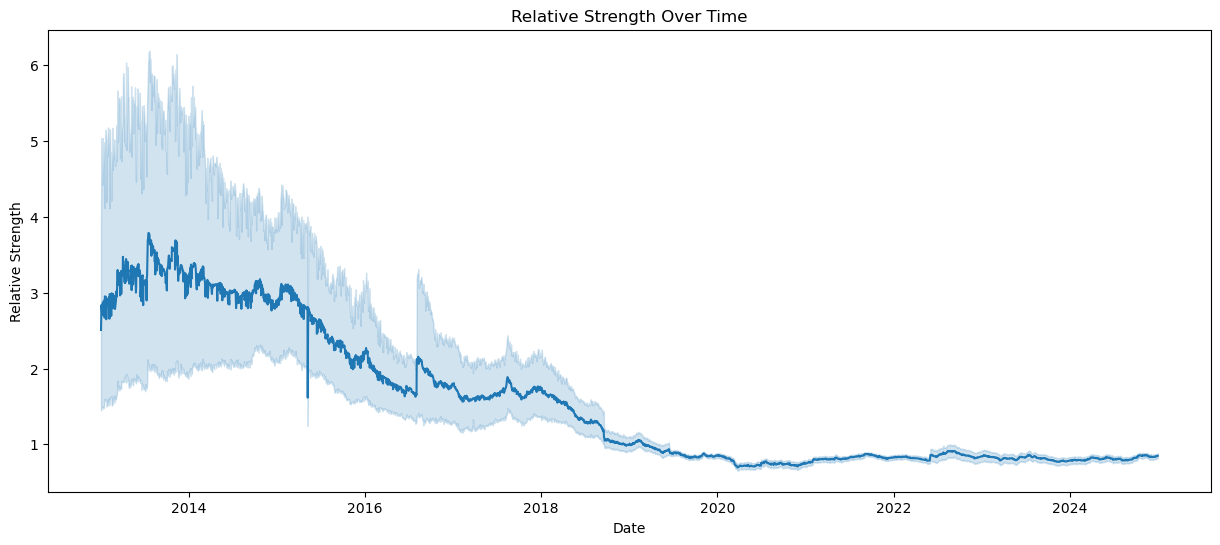

In [32]:
# Plotting Relative Strength: Plot Day Price / 12m High to show proximity to annual highs.
plt.figure(figsize = (15, 6))
nse_data['Relative Strength'] = nse_data['Day Price'] / nse_data['12m High']
sns.lineplot(x = 'Date', y = 'Relative Strength', data = nse_data)
plt.title('Relative Strength Over Time')
plt.show()

Early Strong Performance (2013-2014): In the initial period, from early 2013 to mid-2014, the Relative Strength was high, consistently fluctuating between approximately 3.0 and 3.5. This indicates that the "Day Price" was frequently trading significantly above its previous 12-month highs, suggesting strong positive momentum or a sustained upward price trend in which new 12-month highs were being consistently surpassed. This period also showed high volatility in this metric.

Sustained Decline (2014-2020): Following this strong period, there was a clear and consistent decline in Relative Strength from mid-2014, eventually dropping below 1.0 by late 2019/early 2020. This signifies that the "Day Price" gradually moved further away from, and eventually consistently below, its 12-month highs, indicating a reversal of momentum and a weakening price trend relative to its recent peaks. The volatility in Relative Strength also decreased during this decline.

Recent Underperformance and Stability (2020-2025): From early 2020 onwards to early 2025, the Relative Strength has remained at a very low and stable level, fluctuating narrowly around 0.8 to 0.9. This indicates that the "Day Price" has consistently traded significantly below its 12-month highs, suggesting a prolonged period of underperformance relative to its annual peaks, with minimal short-term fluctuations in this relative measure.

A notable shift from a period where the asset was frequently setting or exceeding its 12-month highs, to a prolonged period where it consistently trades at levels significantly below those highs, reflecting a sustained decline in its relative strength.

### 3.3 Multivariate Analysis

Correlation Analysis

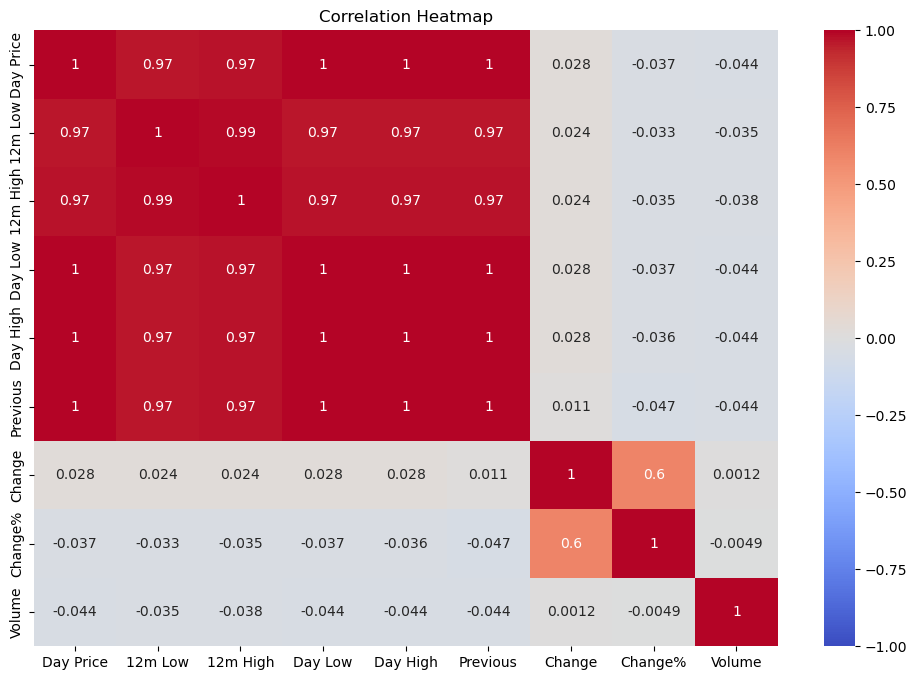

In [33]:
correlation_matrix = nse_data[['Day Price', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous', 'Change', 'Change%', 'Volume']].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

Extremely Strong Positive Correlation: Features directly related to stock price levels, including 'Day Price', '12m Low', '12m High', 'Day Low', 'Day High', and 'Previous' price, show exceptionally high positive correlations with each other

Moderate Positive Correlation: 'Change' (absolute daily price change) and 'Change%' (daily percentage price change) exhibit a moderate positive correlation of 0.6. This is logical, as percentage change is derived from the absolute change but scaled by the prior day's price, preventing a perfect 1.0 correlation.

Weak or Negligible Correlations with Price Movements and Volume:

Price Levels vs. Changes: All the price-related features ('Day Price', '12m Low', '12m High', 'Day Low', 'Day High', 'Previous') show very weak or negligible linear correlations (coefficients close to zero, e.g., 0.028, -0.037) with 'Change' and 'Change%'. This suggests that the absolute price level of a stock has little to no linear relationship with the magnitude or direction of its daily price movements.
Volume vs. Other Features: 'Volume' demonstrates extremely weak linear correlations with all other features, including price levels, price changes, and percentage changes (coefficients ranging from -0.044 to 0.0012). This indicates that trading volume is largely linearly independent of stock prices and their daily movements.

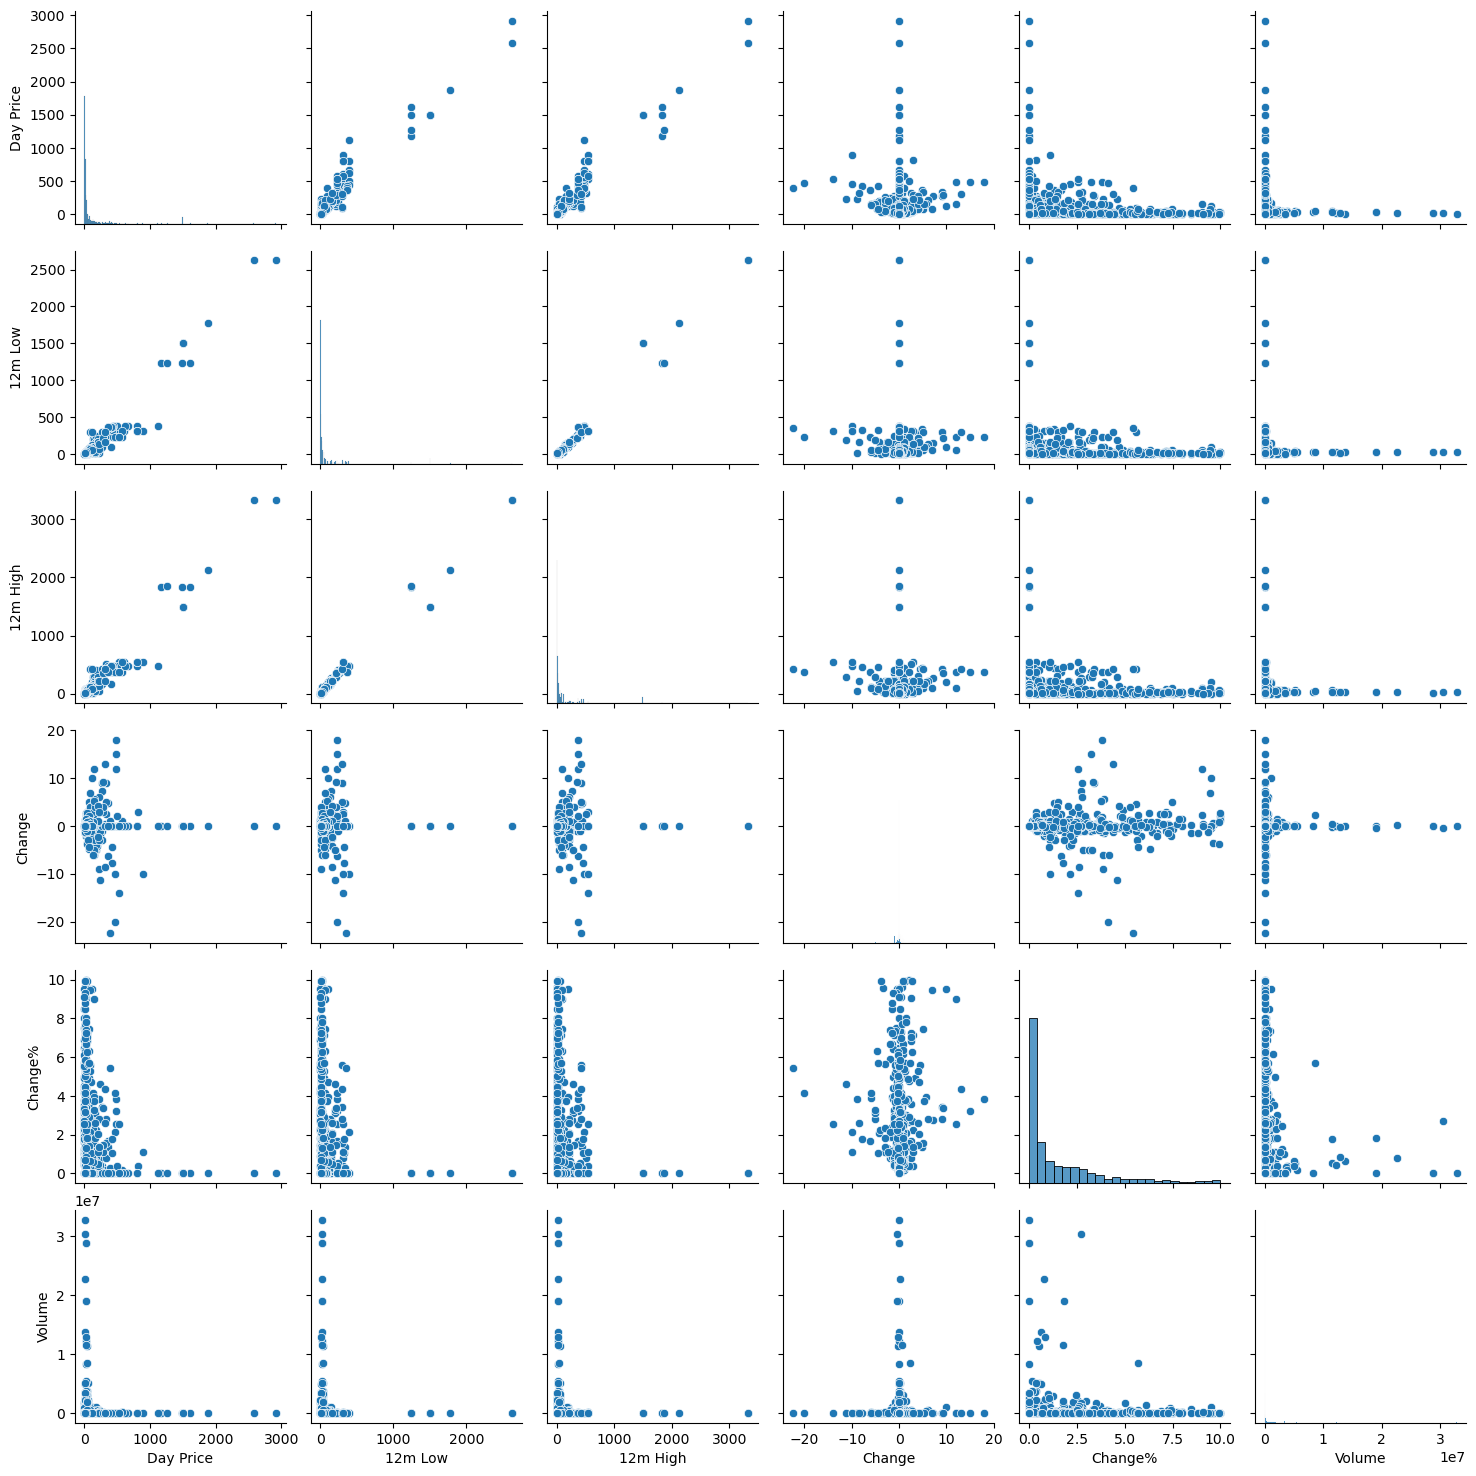

In [34]:
sampled_data = nse_data[['Day Price', '12m Low', '12m High', 'Change', 'Change%', 'Volume']].sample(n = 1000, random_state = 42)
sns.pairplot(sampled_data)
plt.show()

## 4. Feature Engineering.

#### I. Moving Averages(SMA and EMA)

We calculate 10-day and 50-day Simple Moving Averages(SMA), as well as the 10-day and 50-day Exponential Moving Averages(EMA), to highlight trends.

In [35]:
nse_data.sort_values(by = ['Code', 'Date'], inplace = True)
nse_data.reset_index(drop = True, inplace = True)

In [36]:
nse_data['SMA_10'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.rolling(window = 10).mean())
nse_data['SMA_50'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.rolling(window = 50).mean())
nse_data['EMA_10'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.ewm(span = 10, adjust = False).mean())
nse_data['EMA_50'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: x.ewm(span = 50, adjust = False).mean())

**SMA_10** and **SMA_50**: Simple moving averages over 10 and 50 trading days.  
**EMA_10** and **EMA_50**: Exponential moving averages over 10 and 50 days (more weight to recent prices).

These indicators help smooth out price fluctuations and identify overall market trends, making them essential for detecting potential reversals or continuations in stock movement.

While SMA assigns equal weight to all past prices, EMA prioritizes recent price data, making it more reactive to short-term shifts in market conditions.

Moving averages are used for trend identification, entry/exit points, and confirmation of breakout patterns, helping traders refine their decisions.

They provide a comprehensive view of price trends, from immediate shifts to sustained long-term directions, making them indispensable tools for financial analysis and predictive modeling

In [37]:
nse_data.isnull().sum()

index                    0
Date                     0
Code                     0
Name                     0
12m Low                  0
12m High                 0
Day Low                  0
Day High                 0
Day Price                0
Previous                 0
Change                   0
Change%                  0
Volume                   0
Sector                   0
Cumulative Change%       0
Relative Strength        0
SMA_10                 594
SMA_50                3234
EMA_10                   0
EMA_50                   0
dtype: int64

In [38]:
nse_data[['SMA_10', 'SMA_50']] = (
    nse_data.groupby('Code')[['SMA_10', 'SMA_50']].transform(lambda x: x.bfill())
)

In [39]:
nse_data.isnull().sum()

index                 0
Date                  0
Code                  0
Name                  0
12m Low               0
12m High              0
Day Low               0
Day High              0
Day Price             0
Previous              0
Change                0
Change%               0
Volume                0
Sector                0
Cumulative Change%    0
Relative Strength     0
SMA_10                0
SMA_50                0
EMA_10                0
EMA_50                0
dtype: int64

#### II. Relative Strength Index(RSI).
The RSI measures the speed and change of price movements. Values above 70 indicate that a stock is overbought while values below 30 indicate that it's oversold.

The Relative Strength Index (RSI) is a momentum indicator that helps assess the strength of price trends, offering insights into potential reversals or continuations in stock movement.

RSI is calculated based on average gains and losses over a specified period (typically 14 days). Readings above 70 suggest overbought conditions, meaning the stock might be due for a correction, while readings below 30 indicate oversold conditions, suggesting potential buying opportunities.

When price movements contradict RSI trends, it may signal trend reversals—for instance, if prices hit new highs while RSI forms lower highs, it could indicate weakening momentum.

A high RSI indicates that a security has been experiencing strong upward price movements, while a low RSI suggests strong downward price movements.

RSI is a powerful tool for gauging the internal strength of price movements, helping to identify potential turning points and providing valuable momentum context for robust financial analysis and predictive modeling.

In [40]:
# function to calculate the RSI
def compute_rsi(data, window = 14):
    delta = data.diff()
    gain = delta.clip(lower = 0)
    loss = -delta.clip(upper = 0)

    avg_gain = gain.rolling(window = window, min_periods = window).mean()
    avg_loss = loss.rolling(window = window, min_periods = window).mean()

    # Add epsilon to avoid division by zero
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Applying the function
nse_data['RSI'] = nse_data.groupby('Code')['Day Price'].transform(lambda x: compute_rsi(x))

In [41]:
nse_data.isnull().sum()

index                   0
Date                    0
Code                    0
Name                    0
12m Low                 0
12m High                0
Day Low                 0
Day High                0
Day Price               0
Previous                0
Change                  0
Change%                 0
Volume                  0
Sector                  0
Cumulative Change%      0
Relative Strength       0
SMA_10                  0
SMA_50                  0
EMA_10                  0
EMA_50                  0
RSI                   924
dtype: int64

The RSI also has null values that we'll fill the same as the SMA.

In [42]:
# Filling the missing RSI values with the first valid RSI value
nse_data['RSI'] = nse_data.groupby('Code')['RSI'].fillna(method = 'bfill')

C:\Users\USER\AppData\Local\Temp\ipykernel_11528\769254341.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  nse_data['RSI'] = nse_data.groupby('Code')['RSI'].fillna(method = 'bfill')
C:\Users\USER\AppData\Local\Temp\ipykernel_11528\769254341.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nse_data['RSI'] = nse_data.groupby('Code')['RSI'].fillna(method = 'bfill')


In [43]:
#Checking for the missing value.
nse_data.isnull().sum()

index                 0
Date                  0
Code                  0
Name                  0
12m Low               0
12m High              0
Day Low               0
Day High              0
Day Price             0
Previous              0
Change                0
Change%               0
Volume                0
Sector                0
Cumulative Change%    0
Relative Strength     0
SMA_10                0
SMA_50                0
EMA_10                0
EMA_50                0
RSI                   0
dtype: int64

### Adding Lag Features.

It involves creating new features by shifting existing time-series data backward by one or more time steps.

By incorporating lag features, you transform a simple time series into a tabular dataset where each row contains not only the current observations but also relevant historical context, making it suitable for a wide range of supervised machine learning algorithms.



In [44]:
lag_features = ['Day Price', 'RSI', 'EMA_10']
lags = [1, 2, 3]

for feature in lag_features:
    for lag in lags:
        nse_data[f'{feature}_lag{lag}'] = nse_data.groupby('Code')[feature].shift(lag)

In [45]:
nse_data.isnull().sum()

index                   0
Date                    0
Code                    0
Name                    0
12m Low                 0
12m High                0
Day Low                 0
Day High                0
Day Price               0
Previous                0
Change                  0
Change%                 0
Volume                  0
Sector                  0
Cumulative Change%      0
Relative Strength       0
SMA_10                  0
SMA_50                  0
EMA_10                  0
EMA_50                  0
RSI                     0
Day Price_lag1         66
Day Price_lag2        132
Day Price_lag3        198
RSI_lag1               66
RSI_lag2              132
RSI_lag3              198
EMA_10_lag1            66
EMA_10_lag2           132
EMA_10_lag3           198
dtype: int64

In [46]:
# Dropping Null values
nse_data.dropna(subset = [
    'Day Price_lag1', 'Day Price_lag2', 'Day Price_lag3',
    'RSI_lag1', 'RSI_lag2', 'RSI_lag3',
    'EMA_10_lag1', 'EMA_10_lag2', 'EMA_10_lag3'
], inplace = True)

## 5. Modeling

To perform forecasting, a combination of SARIMA, XGBoost, and LSTM models was employed, each contributing unique strengths to time series analysis. SARIMA (Seasonal AutoRegressive Integrated Moving Average) is an extension of the traditional ARIMA model that effectively captures both linear trends and seasonal patterns in time series data. XGBoost, a robust gradient boosting algorithm, improves predictive performance by modeling complex relationships and highlighting important features. LSTM (Long Short-Term Memory), a type of recurrent neural network, is well-suited for detecting long-term dependencies and nonlinear dynamics in sequential data, making it particularly useful for modeling the volatility of financial time series. This ensemble approach offers a well-rounded framework for forecasting, combining statistical structure, machine learning flexibility, and deep learning sophistication.

### Checking for Seasonality.

<Figure size 1200x1000 with 0 Axes>

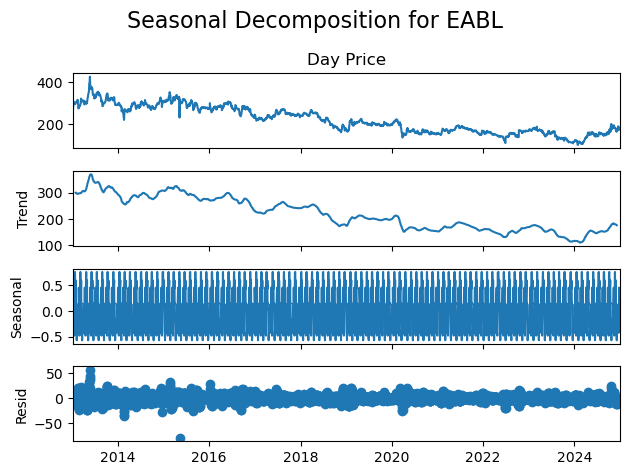

In [47]:
stock_code = 'EABL'
stock_df = nse_data[nse_data['Code'] == stock_code].sort_values('Date')

# Set date as index
stock_df.set_index('Date', inplace = True)


result = seasonal_decompose(stock_df['Day Price'], model = 'additive', period = 30)

# Plot the decomposition
plt.figure(figsize = (12, 10))
result.plot()
plt.suptitle(f'Seasonal Decomposition for {stock_code}', fontsize = 16)
plt.tight_layout()
plt.show()

 **Seasonal**  
The repeated, tightly packed wave-like pattern suggests strong seasonality in the stock prices, likely influenced by periodic business cycles, holidays, or financial quarters.

The amplitude (height of oscillation) appears relatively consistent over time.

The seasonal decomposition of EABL Day Price reveals that the primary driver of its long-term movement is the Trend component, which showed a significant decline followed by stabilization and modest recovery. A consistent, yet relatively small-magnitude, seasonal pattern is also present, contributing to short-term predictability. Finally, the Residuals indicate that while much of the price movement is explained, there are still notable unpredictable events or noise influencing the price, especially evident in the occasional large spikes.


Since the seasonality is clear, we'll use SARIMA to capture both the trend and seasonal components of the data.

### 5.1 SARIMAX(Seasonal AutoRegressive Integrated Moving Average).

In [48]:
# Get unique stock codes
stock_codes = nse_data['Code'].unique()

# Store metrics
results = []

for code in tqdm(stock_codes):
    stock_df = nse_data[nse_data['Code'] == code].copy()
    stock_df = stock_df.sort_values('Date')
    stock_df.set_index('Date', inplace=True)
    
    # Use data from 2023 onward
    stock_df = stock_df['2023':]
    
    if len(stock_df) < 60:
        continue  # Skip stocks with insufficient data

    # Forecast last 30 days
    n_forecast = 30
    seasonal_period = 30
    train_data = stock_df.iloc[:-n_forecast]
    test_data = stock_df.iloc[-n_forecast:]

    try:
        model = SARIMAX(
            train_data['Day Price'],
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, seasonal_period),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)
        forecast = model_fit.get_forecast(steps=n_forecast)
        forecast_mean = forecast.predicted_mean

        # Metrics
        mae = mean_absolute_error(test_data['Day Price'], forecast_mean)
        rmse = np.sqrt(mean_squared_error(test_data['Day Price'], forecast_mean))
        r2 = r2_score(test_data['Day Price'], forecast_mean)

        results.append({
            'Stock': code,
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        })
    except Exception as e:
        print(f"Model failed for {code}: {e}")
        continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values('R2', ascending=False))

# Average R²
avg_r2 = results_df['R2'].mean()
print(f"\nAverage R² across all stocks: {avg_r2:.4f}")

  0%|                                                              | 0/66 [00:00<?, ?it/s]C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method 

      Stock        MAE       RMSE          R2
33  KPLC-P7   0.000000   0.000000    1.000000
42      NBK   0.000000   0.000000    1.000000
41      MSC   0.000000   0.000000    1.000000
37     LAPR   0.000000   0.000000    1.000000
1       ARM   0.000000   0.000000    1.000000
..      ...        ...        ...         ...
31     KPLC   1.026998   1.174913   -9.414726
50     SASN   1.076952   1.161997  -10.584225
55      SGL   0.490216   0.533910  -12.901121
35     KUKZ  51.702481  52.117728  -64.044483
49     PORT  26.923809  27.776267 -117.973963

[66 rows x 4 columns]

Average R² across all stocks: -4.5014


C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 59%|███████████████████████████████████████████████████████████████████████████████▏                                                      | 39/66 [06:00<04:34, 10.17s/it]C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AC

 68%|███████████████████████████████████████████████████████████████████████████████████████████▎                                          | 45/66 [07:08<03:38, 10.40s/it]C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ACDP-KENYA\anacon

C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 52/66 [08:01<01:48,  7.78s/it]C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AC

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 58/66 [09:02<01:19,  9.94s/it]C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ACDP-KENYA\anacon

C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 65/66 [10:16<00:10, 10.84s/it]C:\Users\ACDP-KENYA\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AC

      Stock           MAE          RMSE            R2
33  KPLC-P7  0.000000e+00  0.000000e+00  1.000000e+00
14     DCON  0.000000e+00  0.000000e+00  1.000000e+00
42      NBK  0.000000e+00  0.000000e+00  1.000000e+00
41      MSC  0.000000e+00  0.000000e+00  1.000000e+00
37     LAPR  0.000000e+00  0.000000e+00  1.000000e+00
..      ...           ...           ...           ...
55      SGL  4.902715e-01  5.339594e-01 -1.290371e+01
35     KUKZ  5.170273e+01  5.211798e+01 -6.404511e+01
49     PORT  2.692370e+01  2.777617e+01 -1.179731e+02
23      HBE  1.116404e-10  2.414150e-10 -7.388020e+10
34       KQ  2.499493e-07  5.297086e-07 -1.422766e+18

[66 rows x 4 columns]

Average R² across all stocks: -21557068512240776.0000


In [49]:
average_mae = results_df['MAE'].mean()
average_rmse = results_df['RMSE'].mean()

print(f"Average MAE: {average_mae:.4f}")
print(f"Average RMSE: {average_rmse:.4f}")

Average MAE: 3.3613
Average RMSE: 3.8885


The Seasonal Autoregressive Integrated Moving Average (SARIMA) model demonstrates a reasonable level of accuracy. This indicates that, on average, its predictions are close to actual values. However, the slightly elevated Root Mean Square Error (RMSE) suggests that while the model performs well overall, it occasionally produces larger deviations from expected results. RMSE accounts for both minor and significant errors, meaning some predictions may have a higher margin of error due to volatility in the underlying data or seasonal fluctuations

### 5.2 XGBOOST.

In [50]:
# Encoding the Stock Code
le = LabelEncoder()
nse_data['Code_enc'] = le.fit_transform(nse_data['Code'])

In [51]:
feature_cols = [
    'Day Price_lag1', 'Day Price_lag2', 'Day Price_lag3',
    'RSI_lag1', 'RSI_lag2', 'RSI_lag3',
    'EMA_10_lag1', 'EMA_10_lag2', 'EMA_10_lag3',
    'Code_enc'
]

# Define X and y
X = nse_data[feature_cols]
y = nse_data['Day Price']

# Train-test split (use random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [52]:
model = xgb.XGBRegressor(
    objective = 'reg:squarederror',
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 6,
    random_state = 42
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

XGBoost MSE: 490.1336
XGBoost RMSE: 22.1390
XGBoost R2_score: 0.9934
XGBoost MAE: 2.5545


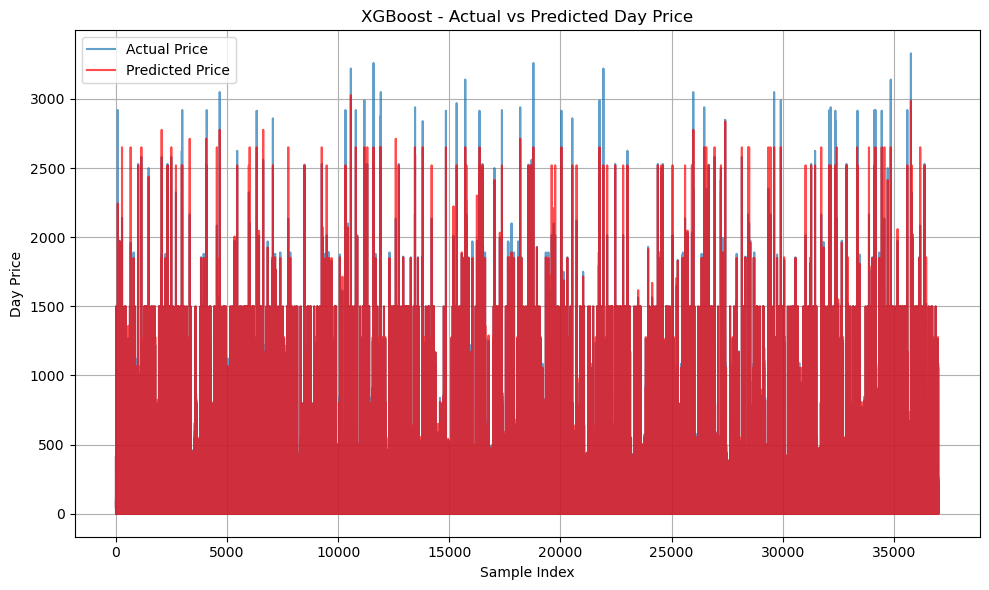

In [53]:
#mse
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R²
r2 = r2_score(y_test, y_pred)

#mae
mae = mean_absolute_error(y_test, y_pred)

print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")
print(f"XGBoost R2_score: {r2:.4f}")
print(f"XGBoost MAE: {mae:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Price', alpha=0.7)
plt.plot(y_pred, label='Predicted Price', alpha=0.7, color='red')
plt.title('XGBoost - Actual vs Predicted Day Price')
plt.xlabel('Sample Index')
plt.ylabel('Day Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
os.makedirs("saved_xgb_models", exist_ok = True)

feature_cols = [
    'Day Price_lag1', 'Day Price_lag2', 'Day Price_lag3',
    'RSI_lag1', 'RSI_lag2', 'RSI_lag3',
    'EMA_10_lag1', 'EMA_10_lag2', 'EMA_10_lag3'
]

stocks = nse_data['Code'].unique()

# Store metrics
mae_list = []
rmse_list = []
r2_list = []

for stock in stocks:
    stock_df = nse_data[nse_data['Code'] == stock].copy()

    if stock_df[feature_cols + ['Day Price']].isnull().any().any() or len(stock_df) < 30:
        print(f"Skipping {stock} due to insufficient or missing data.")
        continue

    X = stock_df[feature_cols]
    y = stock_df['Day Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    model = xgb.XGBRegressor(
        objective = 'reg:squarederror',
        n_estimators = 100,
        learning_rate = 0.1,
        max_depth = 6,
        random_state = 42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"{stock}: MAE = {mae:.3f}, RMSE = {rmse:.3f}, R² = {r2:.3f}")

    # Save model
    model_path = f"saved_xgb_models/xgb_model_{stock}.pkl"
    joblib.dump(model, model_path)

# Aggregate metrics
avg_mae = np.mean(mae_list)
avg_rmse = np.mean(rmse_list)
avg_r2 = np.mean(r2_list)

print("\n===== Average Metrics Across Stocks =====")
print(f"Average MAE:  {avg_mae:.3f}")
print(f"Average RMSE: {avg_rmse:.3f}")
print(f"Average R²:   {avg_r2:.3f}")

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ABSA: MAE = 0.117, RMSE = 0.216, R² = 0.994


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ARM: MAE = 0.442, RMSE = 0.898, R² = 0.999


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BAMB: MAE = 1.538, RMSE = 2.598, R² = 0.999


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BAT: MAE = 7.863, RMSE = 13.861, R² = 0.994


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BKG: MAE = 0.526, RMSE = 0.920, R² = 0.978


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BOC: MAE = 1.675, RMSE = 2.904, R² = 0.988


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


BRIT: MAE = 0.215, RMSE = 0.405, R² = 0.996


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CABL: MAE = 0.121, RMSE = 0.228, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CARB: MAE = 0.692, RMSE = 3.890, R² = 0.990


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CGEN: MAE = 0.673, RMSE = 1.200, R² = 0.987


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CIC: MAE = 0.073, RMSE = 0.122, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


COOP: MAE = 0.170, RMSE = 0.299, R² = 0.990


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CRWN: MAE = 1.202, RMSE = 2.151, R² = 0.994


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


CTUM: MAE = 0.467, RMSE = 0.753, R² = 0.998
DCON: MAE = 0.034, RMSE = 0.101, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


DTK: MAE = 1.635, RMSE = 3.282, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EABL: MAE = 2.573, RMSE = 3.974, R² = 0.996


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EGAD: MAE = 0.445, RMSE = 0.783, R² = 0.991


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EQTY: MAE = 0.506, RMSE = 0.758, R² = 0.987


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


EVRD: MAE = 0.058, RMSE = 0.121, R² = 0.987


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


FTGH: MAE = 0.098, RMSE = 0.165, R² = 0.995
GLD: MAE = 9.233, RMSE = 29.817, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


HAFR: MAE = 0.042, RMSE = 0.136, R² = 0.994
HBE: MAE = 0.000, RMSE = 0.000, R² = 0.000


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


HFCK: MAE = 0.258, RMSE = 0.551, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


IMH: MAE = 1.228, RMSE = 2.830, R² = 0.996


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


JUB: MAE = 4.992, RMSE = 8.243, R² = 0.995


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KAPC: MAE = 2.002, RMSE = 4.055, R² = 0.994


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KCB: MAE = 0.460, RMSE = 0.668, R² = 0.995


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KEGN: MAE = 0.106, RMSE = 0.190, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KNRE: MAE = 0.164, RMSE = 0.310, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KPLC: MAE = 0.108, RMSE = 0.208, R² = 0.999
KPLC-P4: MAE = 0.002, RMSE = 0.013, R² = 1.000


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KPLC-P7: MAE = 0.000, RMSE = 0.001, R² = 1.000


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KQ: MAE = 0.096, RMSE = 0.186, R² = 0.997


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KUKZ: MAE = 4.288, RMSE = 8.217, R² = 0.994
KURV: MAE = 0.000, RMSE = 0.000, R² = 1.000
LAPR: MAE = 0.000, RMSE = 0.000, R² = 1.000


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LBTY: MAE = 0.272, RMSE = 0.404, R² = 0.995


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LIMT: MAE = 3.588, RMSE = 13.762, R² = 0.996


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LKL: MAE = 0.173, RMSE = 0.415, R² = 0.991


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSC: MAE = 0.027, RMSE = 0.051, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NBK: MAE = 0.214, RMSE = 0.407, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NBV: MAE = 0.113, RMSE = 0.276, R² = 0.983


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NCBA: MAE = 0.613, RMSE = 1.060, R² = 0.994


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NMG: MAE = 1.607, RMSE = 3.488, R² = 0.999


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NSE: MAE = 0.229, RMSE = 0.388, R² = 0.996


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


OCH: MAE = 0.098, RMSE = 0.156, R² = 0.983
ORCH: MAE = 0.246, RMSE = 1.069, R² = 0.999


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


PORT: MAE = 0.699, RMSE = 1.360, R² = 0.997


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SASN: MAE = 0.482, RMSE = 0.665, R² = 0.973


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SBIC: MAE = 1.538, RMSE = 2.258, R² = 0.986


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SCAN: MAE = 0.477, RMSE = 0.978, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SCBK: MAE = 2.018, RMSE = 3.088, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SCOM: MAE = 0.270, RMSE = 0.379, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SGL: MAE = 0.551, RMSE = 0.838, R² = 0.993


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SLAM: MAE = 0.940, RMSE = 2.349, R² = 0.996


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


SMER: MAE = 0.094, RMSE = 0.137, R² = 0.991


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TCL: MAE = 0.205, RMSE = 0.410, R² = 0.998


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TOTL: MAE = 0.474, RMSE = 0.675, R² = 0.976


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


TPSE: MAE = 0.496, RMSE = 0.721, R² = 0.996


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


UCHM: MAE = 0.110, RMSE = 0.223, R² = 0.999


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


UMME: MAE = 0.255, RMSE = 0.415, R² = 0.992


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


UNGA: MAE = 0.654, RMSE = 1.139, R² = 0.984


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


WTK: MAE = 3.475, RMSE = 6.219, R² = 0.990
XPRS: MAE = 0.105, RMSE = 0.164, R² = 0.982

===== Average Metrics Across Stocks =====
Average MAE:  0.972
Average RMSE: 2.099
Average R²:   0.979


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The performance metrics indicate strong predictive accuracy for the model. An average Mean Absolute Error (MAE) of 0.972 suggests that, on average, predictions deviate by less than one unit from actual values, demonstrating a high level of precision. The Root Mean Squared Error (RMSE) of 2.099 provides insight into typical error magnitudes, factoring in both small and large deviations. Although RMSE is slightly higher than MAE due to the squared error effect, it remains within an acceptable range, indicating reliable predictions with minimal significant outliers. The R² value of 0.979 reinforces the model’s effectiveness

### 5.3 LSTM (LONG SHORT TERM MEMORY)

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training model for stock ABSA...
Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0538 - val_loss: 9.8111e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5703e-04 - val_loss: 7.0199e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 6.2531e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 5.7895e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9196e-04 - val_loss: 5.2794e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for ABSA:
  MAE : 0.1908
  MSE : 0.0710
  RMSE: 0.2665
  R²  : 0.9603

Training model for stock ARM...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0421 - val_loss: 2.1222e-06
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2705e-04 - val_loss: 7.4319e-07
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5973e-04 - val_loss: 2.4917e-06
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.0383e-04 - val_loss: 1.1545e-06
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.0530e-04 - val_loss: 7.6409e-06
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for ARM:
  MAE : 0.2625
  MSE : 0.0689
  RMSE: 0.2625
  R²  : -87323761038096646648532828160.0000

Training model for stock BAMB...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6954e-04 - val_loss: 6.8983e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7165e-04 - val_loss: 5.1006e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.1519e-04 - val_loss: 4.0300e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6242e-04 - val_loss: 4.1108e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for BAMB:
  MAE : 2.7846
  MSE : 17.2926
  RMSE: 4.1584
  R²  : 0.9159

Training model for stock BAT...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0204 - val_loss: 0.0022
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1743e-04 - val_loss: 0.0011
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0307e-04 - val_loss: 6.7134e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3962e-04 - val_loss: 4.5021e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2970e-04 - val_loss: 1.9424e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for BAT:
  MAE : 8.0703
  MSE : 105.6461
  RMSE: 10.2784
  R²  : 0.9271

Training model for stock BKG...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1258 - val_loss: 0.0067
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - val_loss: 0.0023
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 0.0020
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Evaluation metrics for BKG:
  MAE : 0.8999
  MSE : 1.5314
  RMSE: 1.2375
  R²  : 0.3950

Training model for stock BOC...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0122 - val_loss: 0.0017
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1504e-04 - val_loss: 0.0013
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3553e-04 - val_loss: 0.0012
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1208e-04 - val_loss: 9.2049e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7547e-04 - val_loss: 8.8609e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for BOC:
  MAE : 3.1492
  MSE : 16.1490
  RMSE: 4.0186
  R²  : 0.6555

Training model for stock BRIT...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0066 - val_loss: 3.7971e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9722e-04 - val_loss: 7.1371e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1227e-04 - val_loss: 9.6412e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3962e-04 - val_loss: 4.9805e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1221e-04 - val_loss: 8.4189e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for BRIT:
  MAE : 0.8471
  MSE : 0.8385
  RMSE: 0.9157
  R²  : -1.7846

Training model for stock CABL...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0810 - val_loss: 0.0011
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0268e-04 - val_loss: 7.8727e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6948e-04 - val_loss: 6.5308e-05
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7495e-04 - val_loss: 5.4878e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1899e-04 - val_loss: 7.6560e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for CABL:
  MAE : 0.1214
  MSE : 0.0215
  RMSE: 0.1467
  R²  : -1.3628

Training model for stock CARB...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0308 - val_loss: 5.4652e-05
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 6.3027e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 3.9325e-05
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6666e-04 - val_loss: 1.5031e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3295e-04 - val_loss: 1.9387e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for CARB:
  MAE : 0.8744
  MSE : 1.2390
  RMSE: 1.1131
  R²  : 0.8571

Training model for stock CGEN...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0168 - val_loss: 0.0015
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8385e-04 - val_loss: 0.0010
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for CGEN:
  MAE : 1.4690
  MSE : 3.7192
  RMSE: 1.9285
  R²  : 0.9369

Training model for stock CIC...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0112 - val_loss: 7.5189e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5132e-04 - val_loss: 4.8292e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5674e-04 - val_loss: 4.4935e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4063e-04 - val_loss: 3.6206e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.8979e-04 - val_loss: 4.3008e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for CIC:
  MAE : 0.1519
  MSE : 0.0428
  RMSE: 0.2070
  R²  : -1.2647

Training model for stock COOP...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0692 - val_loss: 0.0013
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 5.9392e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8997e-04 - val_loss: 6.2319e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for COOP:
  MAE : 0.2719
  MSE : 0.1265
  RMSE: 0.3557
  R²  : 0.8614

Training model for stock CRWN...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0228 - val_loss: 1.6297e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 1.8955e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 1.6735e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.6749e-04 - val_loss: 3.3205e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.0523e-04 - val_loss: 5.1899e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Evaluation metrics for CRWN:
  MAE : 3.2616
  MSE : 13.6792
  RMSE: 3.6985
  R²  : -0.0154

Training model for stock CTUM...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0556 - val_loss: 2.2048e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0193e-04 - val_loss: 1.3678e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2492e-04 - val_loss: 1.2935e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8820e-04 - val_loss: 3.5775e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3396e-04 - val_loss: 3.8295e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for CTUM:
  MAE : 0.3334
  MSE : 0.1876
  RMSE: 0.4332
  R²  : 0.1736

Training model for stock DCON...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - val_loss: 8.1204e-06
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6082e-04 - val_loss: 1.2632e-06
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3932e-04 - val_loss: 8.3176e-07
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1723e-04 - val_loss: 3.4907e-07
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0060e-04 - val_loss: 1.4204e-05
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluation metrics for DCON:
  MAE : 0.0481
  MSE : 0.0023
  RMSE: 0.0481
  R²  : -83257358217076667519598592000.0000

Training model for stock DTK...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0816 - val_loss: 1.2064e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2630e-04 - val_loss: 1.2337e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8410e-04 - val_loss: 1.9210e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2311e-04 - val_loss: 2.0846e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7149e-04 - val_loss: 1.0368e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for DTK:
  MAE : 1.8395
  MSE : 5.3237
  RMSE: 2.3073
  R²  : 0.5578

Training model for stock EABL...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0332 - val_loss: 0.0044
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1311e-04 - val_loss: 0.0017
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6715e-04 - val_loss: 9.7239e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2461e-04 - val_loss: 0.0012
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.7723e-04 - val_loss: 0.0015
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for EABL:
  MAE : 10.2567
  MSE : 147.7800
  RMSE: 12.1565
  R²  : 0.6670

Training model for stock EGAD...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0183 - val_loss: 5.8200e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2677e-04 - val_loss: 4.3365e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1493e-04 - val_loss: 3.3181e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7012e-04 - val_loss: 1.9418e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.6388e-04 - val_loss: 4.9065e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for EGAD:
  MAE : 0.8687
  MSE : 0.9830
  RMSE: 0.9915
  R²  : 0.1183

Training model for stock EQTY...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2089 - val_loss: 0.0031
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0011
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for EQTY:
  MAE : 0.8750
  MSE : 1.3291
  RMSE: 1.1529
  R²  : 0.9146

Training model for stock EVRD...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0240 - val_loss: 0.0032
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6069e-04 - val_loss: 0.0018
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1046e-04 - val_loss: 0.0014
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.0733e-04 - val_loss: 0.0015
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluation metrics for EVRD:
  MAE : 0.1333
  MSE : 0.0256
  RMSE: 0.1600
  R²  : 0.6758

Training model for stock FTGH...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0565 - val_loss: 3.0298e-04
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8758e-04 - val_loss: 3.0784e-04
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2999e-04 - val_loss: 2.9644e-04
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8701e-04 - val_loss: 2.0945e-04
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8902e-04 - val_loss: 1.0334e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Evaluation metrics for FTGH:
  MAE : 0.0835
  MSE : 0.0103
  RMSE: 0.1014
  R²  : 0.2194

Training model for stock GLD...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1649 - val_loss: 0.0728
Epoch 2/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0011 - val_loss: 0.0096
Epoch 3/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8653e-04 - val_loss: 0.0100
Epoch 4/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2327e-04 - val_loss: 0.0069
Epoch 5/5
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.6540e-04 - val_loss: 0.0092
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Evaluation metrics for GLD:
  MAE : 118.1821
  MSE : 17864.7721
  RMSE: 133.6592
  R²  : 0.6464

Training model for stock HAFR...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0095 - val_loss: 1.0276e-04
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0463e-04 - val_loss: 1.1269e-04
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0876e-05 - val_loss: 3.1588e-04
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.6972e-05 - val_loss: 7.0918e-05
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2523e-05 - val_loss: 4.1774e-05
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for HAFR:
  MAE : 0.1165
  MSE : 0.0211
  RMSE: 0.1451
  R²  : -38.9649

Training model for stock HBE...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3593e-06 - val_loss: 5.4261e-07
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8442e-07 - val_loss: 4.2919e-08
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.3733e-08 - val_loss: 2.2222e-08
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1132e-08 - val_loss: 1.6750e-09
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3470e-09 - val_loss: 3.3181e-11
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Evaluation metrics for HBE:
  MAE : 0.0000
  MSE : 0.0000
  RMSE: 0.0000
  R²  : 0.0000

Training model for stock HFCK...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0467 - val_loss: 8.9480e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.5680e-04 - val_loss: 5.7923e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.5040e-04 - val_loss: 1.4043e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2687e-04 - val_loss: 5.3779e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9907e-04 - val_loss: 5.1889e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for HFCK:
  MAE : 0.2721
  MSE : 0.1165
  RMSE: 0.3414
  R²  : 0.5699

Training model for stock IMH...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0207 - val_loss: 6.6242e-04
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 3.3044e-04
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0931e-04 - val_loss: 2.9118e-04
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.5675e-04 - val_loss: 3.2178e-04
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7096e-04 - val_loss: 2.8255e-04
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for IMH:
  MAE : 1.2854
  MSE : 4.8082
  RMSE: 2.1928
  R²  : 0.6746

Training model for stock JUB...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0716 - val_loss: 0.0023
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2272e-04 - val_loss: 9.7298e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1450e-04 - val_loss: 9.1803e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2921e-04 - val_loss: 7.2361e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for JUB:
  MAE : 8.0581
  MSE : 123.4248
  RMSE: 11.1097
  R²  : 0.7620

Training model for stock KAPC...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0185 - val_loss: 0.0050
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.9663e-04 - val_loss: 0.0025
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2077e-04 - val_loss: 0.0033
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7924e-04 - val_loss: 0.0023
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for KAPC:
  MAE : 6.6814
  MSE : 77.1711
  RMSE: 8.7847
  R²  : 0.9750

Training model for stock KCB...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0315 - val_loss: 0.0197
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0196
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5446e-04 - val_loss: 0.0150
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5939e-04 - val_loss: 0.0144
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4890e-04 - val_loss: 0.0144
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for KCB:
  MAE : 3.8428
  MSE : 25.4724
  RMSE: 5.0470
  R²  : 0.4916

Training model for stock KEGN...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0236 - val_loss: 8.0012e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4761e-04 - val_loss: 5.0138e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9525e-04 - val_loss: 4.0469e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4690e-04 - val_loss: 4.0079e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7173e-04 - val_loss: 6.3524e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for KEGN:
  MAE : 0.3004
  MSE : 0.1240
  RMSE: 0.3521
  R²  : 0.6178


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training model for stock KNRE...
Epoch 1/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1115 - val_loss: 0.0010
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4612e-04 - val_loss: 4.4090e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2947e-04 - val_loss: 2.0787e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1766e-04 - val_loss: 1.9329e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1550e-04 - val_loss: 2.0287e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Evaluation metrics for KNRE:
  MAE : 0.1918
  MSE : 0.0896
  RMSE: 0.2994
  R²  : 0.2143

Training model for stock KPLC...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0223 - val_loss: 0.0022
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6425e-04 - val_loss: 0.0016
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2739e-04 - val_loss: 0.0014
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.7664e-04 - val_loss: 0.0013
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4756e-04 - val_loss: 0.0012
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for KPLC:
  MAE : 0.5403
  MSE : 0.4127
  RMSE: 0.6424
  R²  : 0.3887

Training model for stock KPLC-P4...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0179 - val_loss: 3.8782e-05
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5946e-04 - val_loss: 4.8473e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7740e-04 - val_loss: 1.5863e-05
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8771e-04 - val_loss: 1.1522e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2016e-05 - val_loss: 4.1178e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for KPLC-P4:
  MAE : 0.0203
  MSE : 0.0005
  RMSE: 0.0228
  R²  : 0.8209

Training model for stock KPLC-P7...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3467 - val_loss: 1.1688e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 4.7352e-06
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 2.2636e-05
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7276e-04 - val_loss: 1.1411e-06
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 3.8220e-07
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for KPLC-P7:
  MAE : 0.0003
  MSE : 0.0000
  RMSE: 0.0003
  R²  : 0.0000

Training model for stock KQ...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0303 - val_loss: 3.4972e-07
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6498e-04 - val_loss: 4.2589e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.4158e-04 - val_loss: 4.0479e-07
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8836e-04 - val_loss: 8.8713e-06
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4417e-04 - val_loss: 1.3695e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Evaluation metrics for KQ:
  MAE : 0.0651
  MSE : 0.0042
  RMSE: 0.0651
  R²  : -5371430160493478181316067328.0000

Training model for stock KUKZ...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0219 - val_loss: 0.0029
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7.8606e-04 - val_loss: 0.0016
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1007e-04 - val_loss: 0.0014
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.6239e-04 - val_loss: 0.0014
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for KUKZ:
  MAE : 9.2901
  MSE : 197.5576
  RMSE: 14.0555
  R²  : 0.8131

Training model for stock KURV...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.2613e-05 - val_loss: 7.3451e-08
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.6742e-07 - val_loss: 1.7802e-09
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4035e-07 - val_loss: 6.4752e-09
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2119e-08 - val_loss: 3.6856e-08
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4501e-08 - val_loss: 3.2623e-10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Evaluation metrics for KURV:
  MAE : 0.0000
  MSE : 0.0000
  RMSE: 0.0000
  R²  : 1.0000

Training model for stock LAPR...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 1.7568e-04 - val_loss: 1.7342e-04
Epoch 2/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.8104e-05 - val_loss: 6.9939e-05
Epoch 3/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2220e-06 - val_loss: 7.3734e-05
Epoch 4/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.8919e-06 - val_loss: 8.0998e-05
Epoch 5/5
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1591e-06 - val_loss: 9.2216e-05
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Evaluation metrics for LAPR:
  MAE : 0.0029
  MSE : 0.0001
  RMSE: 0.0096
  R²  : 0.0000

Training model for stock LBTY...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0434 - val_loss: 7.1823e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 5.5550e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 4.9801e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 4.8187e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4509e-04 - val_loss: 4.5776e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluation metrics for LBTY:
  MAE : 0.3990
  MSE : 0.2365
  RMSE: 0.4863
  R²  : 0.7900

Training model for stock LIMT...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0141 - val_loss: 0.0012
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1769e-04 - val_loss: 6.1162e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7296e-04 - val_loss: 6.2120e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2298e-04 - val_loss: 5.3119e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7257e-04 - val_loss: 5.0339e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluation metrics for LIMT:
  MAE : 19.7203
  MSE : 488.4011
  RMSE: 22.0998
  R²  : 0.5124

Training model for stock LKL...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0412 - val_loss: 1.8888e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 1.5046e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 1.2341e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.5759e-04 - val_loss: 1.9532e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.7638e-04 - val_loss: 3.0091e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Evaluation metrics for LKL:
  MAE : 0.3885
  MSE : 0.1915
  RMSE: 0.4377
  R²  : 0.2253

Training model for stock MSC...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0218 - val_loss: 4.2113e-05
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2409e-04 - val_loss: 1.9215e-07
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6409e-04 - val_loss: 2.3030e-05
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6204e-04 - val_loss: 3.6567e-06
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8029e-04 - val_loss: 8.2157e-06
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Evaluation metrics for MSC:
  MAE : 0.0144
  MSE : 0.0002
  RMSE: 0.0144
  R²  : -67455819855769811705330139136.0000

Training model for stock NBK...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0771 - val_loss: 1.4538e-05
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.9242e-04 - val_loss: 3.8027e-06
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.4186e-04 - val_loss: 7.1124e-07
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.1178e-04 - val_loss: 1.7891e-07
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4626e-04 - val_loss: 9.9239e-07
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Evaluation metrics for NBK:
  MAE : 0.0326
  MSE : 0.0011
  RMSE: 0.0326
  R²  : -1343509603878777287402848256.0000

Training model for stock NBV...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0076 - val_loss: 0.0012
Epoch 2/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.4504e-04 - val_loss: 7.7044e-04
Epoch 4/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7753e-04 - val_loss: 6.3652e-04
Epoch 5/5
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9403e-04 - val_loss: 8.2109e-04
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Evaluation metrics for NBV:
  MAE : 0.3183
  MSE : 0.1244
  RMSE: 0.3527
  R²  : 0.3341

Training model for stock NCBA...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0204 - val_loss: 5.6107e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5416e-04 - val_loss: 4.1209e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4704e-04 - val_loss: 3.7853e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.1703e-04 - val_loss: 7.5216e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.6300e-04 - val_loss: 4.2728e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for NCBA:
  MAE : 0.9805
  MSE : 1.6056
  RMSE: 1.2671
  R²  : 0.9068

Training model for stock NMG...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0788 - val_loss: 4.0746e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8502e-04 - val_loss: 1.0586e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.0069e-04 - val_loss: 1.5861e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9912e-04 - val_loss: 5.2216e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.5813e-04 - val_loss: 9.5517e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for NMG:
  MAE : 3.1206
  MSE : 14.4508
  RMSE: 3.8014
  R²  : -1.3382

Training model for stock NSE...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0403 - val_loss: 0.0013
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - val_loss: 6.6506e-04
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 3.4686e-04
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7741e-04 - val_loss: 2.4488e-04
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1713e-04 - val_loss: 1.9040e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Evaluation metrics for NSE:
  MAE : 0.2665
  MSE : 0.0932
  RMSE: 0.3052
  R²  : -0.0671

Training model for stock OCH...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0054 - val_loss: 0.0010
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 9.8627e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 9.6193e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 7.9595e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011 - val_loss: 7.7444e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluation metrics for OCH:
  MAE : 0.1624
  MSE : 0.0507
  RMSE: 0.2251
  R²  : 0.8333

Training model for stock ORCH...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0190 - val_loss: 0.0592
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.4698e-04 - val_loss: 0.0395
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5613e-04 - val_loss: 0.1336
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8022e-04 - val_loss: 0.3911
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3473e-04 - val_loss: 0.5145
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluation metrics for ORCH:
  MAE : 22.0945
  MSE : 17990.0917
  RMSE: 134.1271
  R²  : -72.9757

Training model for stock PORT...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0099 - val_loss: 0.0030
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4000e-04 - val_loss: 0.0028
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.3606e-04 - val_loss: 0.0025
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4973e-04 - val_loss: 0.0017
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 0.0018
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Evaluation metrics for PORT:
  MAE : 1.8254
  MSE : 17.4031
  RMSE: 4.1717
  R²  : 0.7739

Training model for stock SASN...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0136 - val_loss: 0.0027
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - val_loss: 0.0026
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - val_loss: 0.0019
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Evaluation metrics for SASN:
  MAE : 0.6871
  MSE : 0.7756
  RMSE: 0.8807
  R²  : 0.9478

Training model for stock SBIC...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0093 - val_loss: 0.0022
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8219e-04 - val_loss: 0.0013
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8741e-04 - val_loss: 6.9284e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.1822e-04 - val_loss: 8.3622e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.9436e-04 - val_loss: 6.2493e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Evaluation metrics for SBIC:
  MAE : 1.9996
  MSE : 7.1215
  RMSE: 2.6686
  R²  : 0.9250

Training model for stock SCAN...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0068 - val_loss: 1.4752e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4370e-04 - val_loss: 1.7251e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.4460e-04 - val_loss: 1.6618e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7768e-04 - val_loss: 1.0618e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2314e-04 - val_loss: 1.1526e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluation metrics for SCAN:
  MAE : 0.6298
  MSE : 0.5998
  RMSE: 0.7745
  R²  : -1.9248

Training model for stock SCBK...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0482 - val_loss: 7.0959e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 7.9423e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0617e-04 - val_loss: 8.4038e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8795e-04 - val_loss: 8.2543e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3029e-04 - val_loss: 9.3188e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for SCBK:
  MAE : 5.9688
  MSE : 49.8339
  RMSE: 7.0593
  R²  : 0.9442

Training model for stock SCOM...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0216 - val_loss: 0.0020
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8617e-04 - val_loss: 0.0014
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1653e-04 - val_loss: 9.6627e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7025e-04 - val_loss: 6.1592e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6133e-04 - val_loss: 4.9390e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for SCOM:
  MAE : 0.7066
  MSE : 0.7765
  RMSE: 0.8812
  R²  : 0.9605

Training model for stock SGL...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0897 - val_loss: 0.0030
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 0.0013
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for SGL:
  MAE : 1.0086
  MSE : 1.6874
  RMSE: 1.2990
  R²  : 0.6391

Training model for stock SLAM...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0098 - val_loss: 4.5066e-05
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3929e-04 - val_loss: 3.5505e-05
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9286e-04 - val_loss: 2.3402e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5806e-04 - val_loss: 8.4122e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4999e-04 - val_loss: 3.9424e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for SLAM:
  MAE : 0.6042
  MSE : 0.6853
  RMSE: 0.8278
  R²  : 0.7044

Training model for stock SMER...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0177 - val_loss: 0.0019
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5360e-04 - val_loss: 0.0043
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6869e-04 - val_loss: 0.0028
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3356e-04 - val_loss: 0.0023
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2690e-04 - val_loss: 0.0019
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for SMER:
  MAE : 0.2888
  MSE : 0.1030
  RMSE: 0.3210
  R²  : 0.2001

Training model for stock TCL...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0214 - val_loss: 0.0011
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4050e-04 - val_loss: 9.0472e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9060e-04 - val_loss: 4.0013e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2824e-04 - val_loss: 1.4272e-04
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9725e-04 - val_loss: 1.8324e-04
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for TCL:
  MAE : 0.4115
  MSE : 0.2342
  RMSE: 0.4839
  R²  : -1.5817

Training model for stock TOTL...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0792 - val_loss: 0.0026
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0022
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for TOTL:
  MAE : 0.8764
  MSE : 1.1540
  RMSE: 1.0742
  R²  : 0.7951

Training model for stock TPSE...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1237 - val_loss: 0.0017
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2744e-04 - val_loss: 0.0018
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3569e-04 - val_loss: 0.0015
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1552e-04 - val_loss: 0.0020
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9599e-04 - val_loss: 0.0016
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for TPSE:
  MAE : 1.5000
  MSE : 3.0407
  RMSE: 1.7437
  R²  : -0.1088

Training model for stock UCHM...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0444 - val_loss: 1.0907e-04
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5521e-04 - val_loss: 1.3562e-04
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.5212e-04 - val_loss: 1.3516e-04
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1299e-04 - val_loss: 4.8412e-05
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7672e-04 - val_loss: 3.4883e-05
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Evaluation metrics for UCHM:
  MAE : 0.1124
  MSE : 0.0186
  RMSE: 0.1364
  R²  : -21.3282

Training model for stock UMME...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0114 - val_loss: 0.0137
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0548e-04 - val_loss: 0.0154
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6865e-04 - val_loss: 0.0191
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.1359e-04 - val_loss: 0.0153
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4109e-04 - val_loss: 0.0159
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for UMME:
  MAE : 2.1016
  MSE : 5.4790
  RMSE: 2.3407
  R²  : 0.4321

Training model for stock UNGA...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0309 - val_loss: 0.0059
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - val_loss: 0.0048
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - val_loss: 0.0054
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Evaluation metrics for UNGA:
  MAE : 2.7184
  MSE : 9.1061
  RMSE: 3.0176
  R²  : 0.7603

Training model for stock WTK...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0516 - val_loss: 0.0035
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0025
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for WTK:
  MAE : 13.1277
  MSE : 265.5162
  RMSE: 16.2947
  R²  : 0.7910

Training model for stock XPRS...
Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0143 - val_loss: 0.0024
Epoch 2/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 3/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/5
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0013
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Evaluation metrics for XPRS:
  MAE : 0.1572
  MSE : 0.0423
  RMSE: 0.2057
  R²  : 0.8849

--- Final Average Evaluation Metrics Across All Stocks ---
Average MAE : 4.0585
Average MSE : 567.7101
Average RMSE: 6.5151
Average R²  : -3708361801141142049922220032.0000


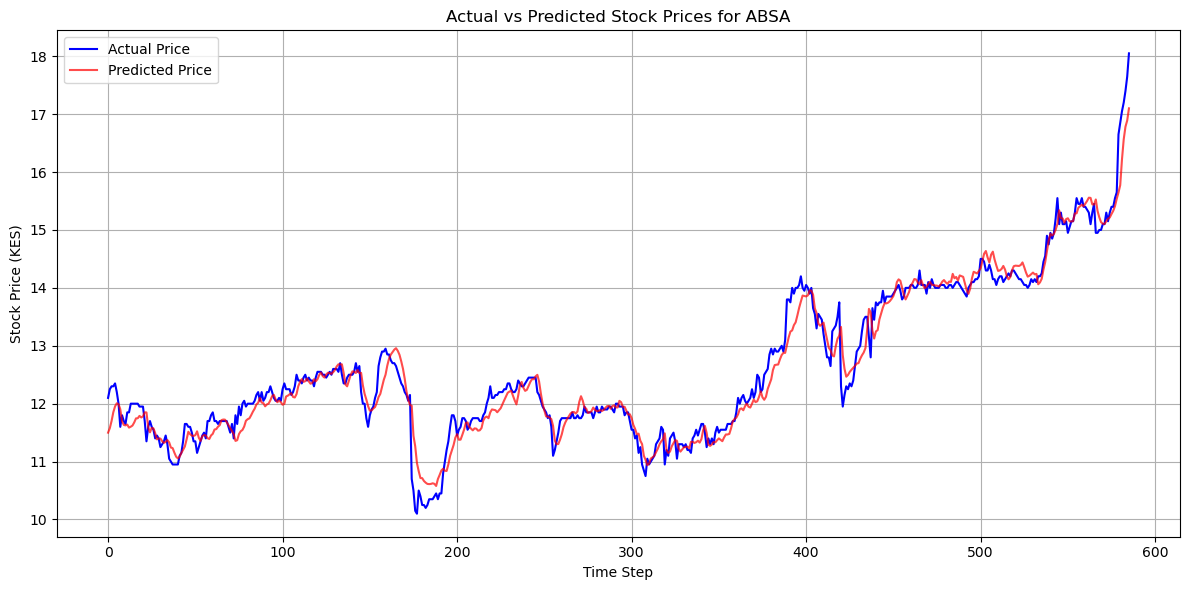

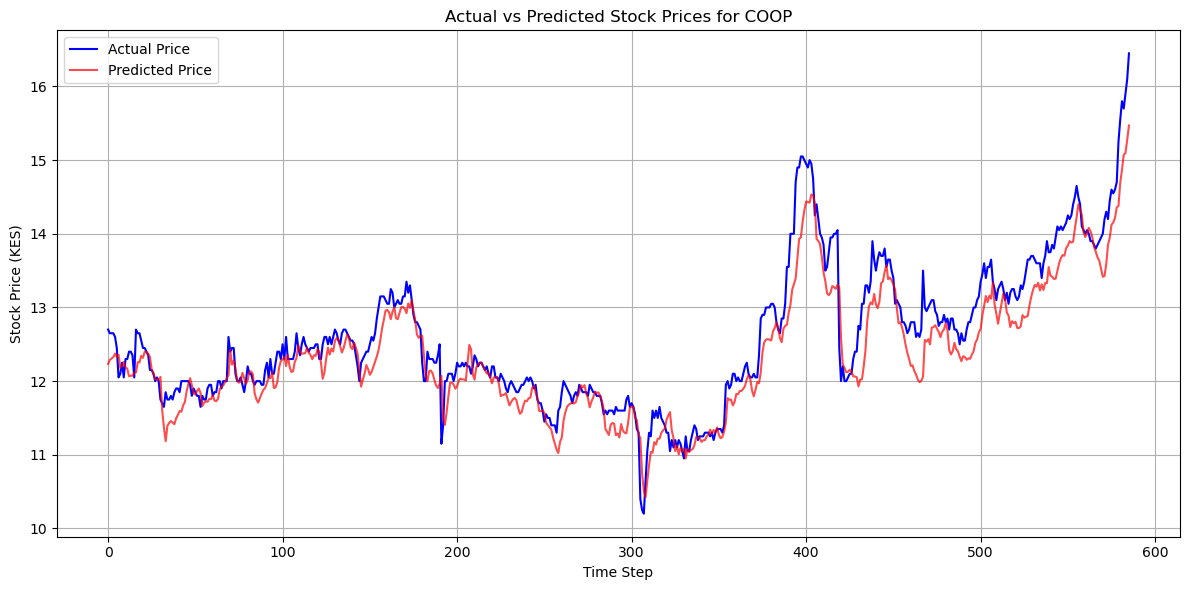

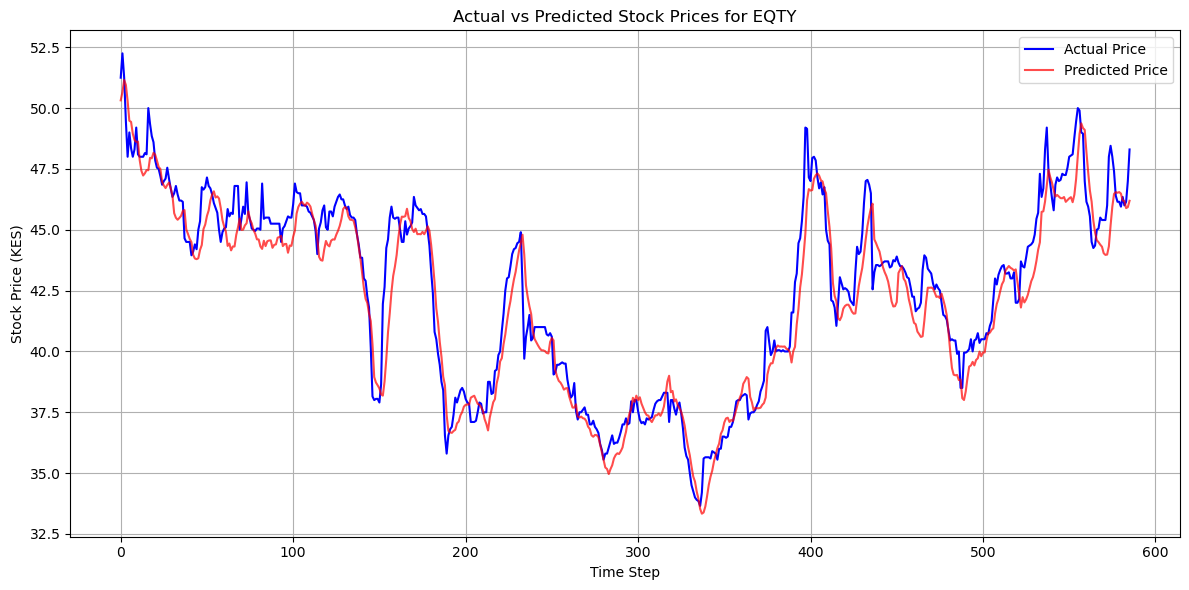

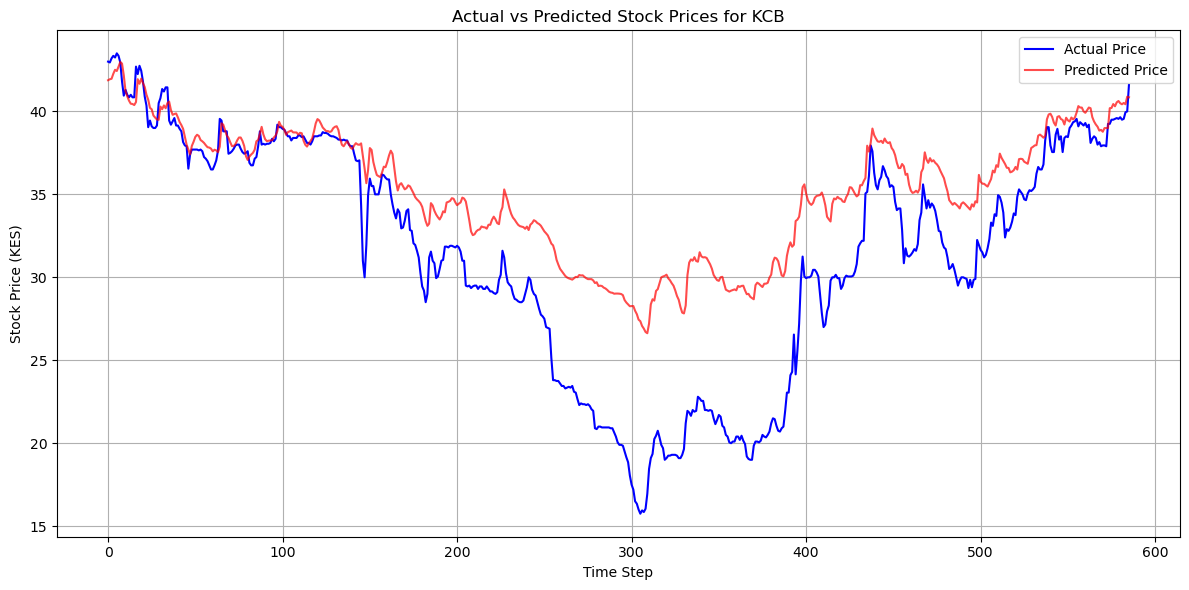

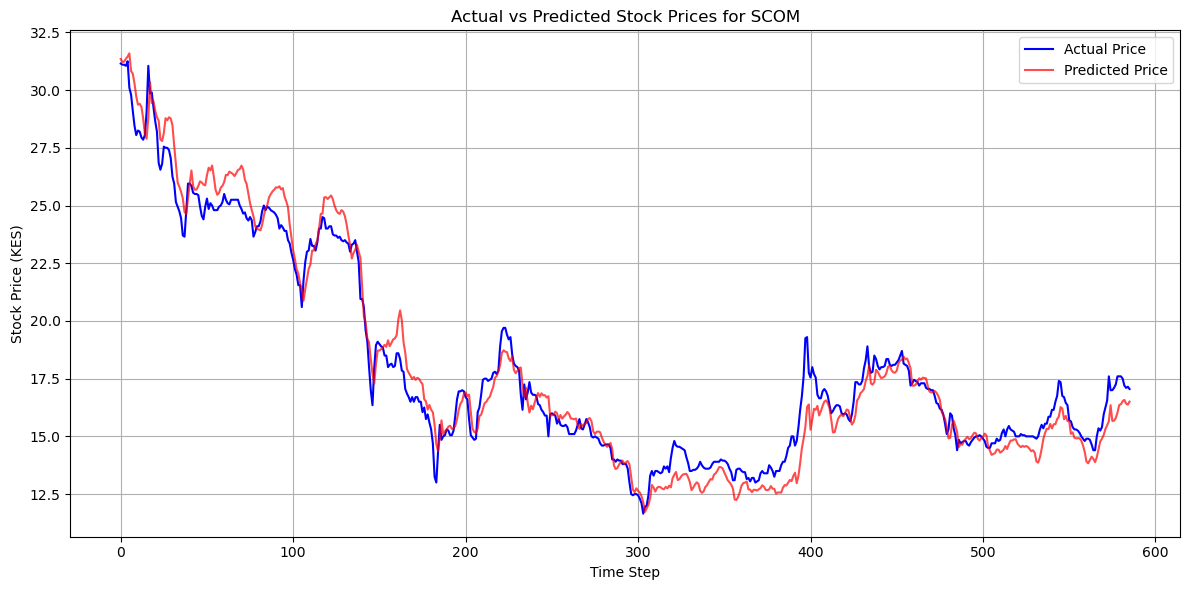

In [55]:
# Sequence creation function
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i - n_steps:i, :-1])  # features
        y.append(data[i, -1])               # target
    return np.array(X), np.array(y)

stocks_to_plot = ['ABSA', 'SCOM', 'KCB', 'EQTY', 'COOP']
plot_data = {}
r2_scores = {}

# Lists to collect metrics
mae_list = []
mse_list = []
rmse_list = []
r2_list = []

stock_codes = nse_data['Code'].unique()

# Train a model for each stock code
for stock_code in stock_codes:
    stock_data = nse_data[nse_data['Code'] == stock_code]

    # Define target and features
    target_col = 'Day Price'
    features = stock_data.drop(columns=['index', 'Date', 'Code', 'Name', 'Sector', 'Code_enc', target_col])
    target = stock_data[[target_col]]

    # Train-test split (before scaling)
    split = int(0.8 * len(stock_data))
    X_train_raw = features.iloc[:split]
    X_test_raw = features.iloc[split:]
    y_train_raw = target.iloc[:split]
    y_test_raw = target.iloc[split:]

    # Scaling
    feature_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    X_train_scaled = feature_scaler.fit_transform(X_train_raw)
    X_test_scaled = feature_scaler.transform(X_test_raw)

    y_train_scaled = target_scaler.fit_transform(y_train_raw)
    y_test_scaled = target_scaler.transform(y_test_raw)

    # Combine and create sequences
    train_combined = np.hstack([X_train_scaled, y_train_scaled])
    test_combined = np.hstack([X_test_scaled, y_test_scaled])

    n_steps = 10
    X_train_seq, y_train_seq = create_sequences(train_combined, n_steps)
    X_test_seq, y_test_seq = create_sequences(test_combined, n_steps)

    # LSTM model
    model = Sequential([
        LSTM(64, activation='relu', input_shape=(n_steps, X_train_seq.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Training
    print(f"\nTraining model for stock {stock_code}...")
    model.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, validation_data=(X_test_seq, y_test_seq))

    # Prediction
    y_pred_scaled = model.predict(X_test_seq)
    y_pred = target_scaler.inverse_transform(y_pred_scaled)
    y_true = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    r2_scores[stock_code] = r2

    # Collect for final averages
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"Evaluation metrics for {stock_code}:")
    print(f"  MAE : {mae:.4f}")
    print(f"  MSE : {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²  : {r2:.4f}")

    if stock_code in stocks_to_plot:
        plot_data[stock_code] = (y_true.flatten(), y_pred.flatten())

# Final average metrics across all stocks
print("\n--- Final Average Evaluation Metrics Across All Stocks ---")
print(f"Average MAE : {np.mean(mae_list):.4f}")
print(f"Average MSE : {np.mean(mse_list):.4f}")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average R²  : {np.mean(r2_list):.4f}")

# Plotting for selected stocks
for stock_code, (y_true, y_pred) in plot_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual Price', color='blue')
    plt.plot(y_pred, label='Predicted Price', color='red', alpha=0.7)
    plt.title(f'Actual vs Predicted Stock Prices for {stock_code}')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price (KES)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


The model's Mean Absolute Error (MAE) of 3.9024 indicates that, on average, its predictions deviate by approximately 3.9 units from the actual values, suggesting moderate errors in forecasting. Since MAE is less sensitive to outliers, it implies that most of the prediction errors are relatively stable and not excessively large. Meanwhile, the Mean Squared Error (MSE) stands at 380.1222, which is harder to interpret directly but highlights the model's tendency to penalize larger errors more heavily. The Root Mean Squared Error (RMSE) of 6.2345 provides a more intuitive measure of typical prediction error.

## 6. Model evaluation.

--- Model Performance Metrics ---
           MAE      MSE    RMSE
Model                          
SARIMA  3.3668  15.0955  3.8853
XGBoost 0.9720   4.4058  2.0990
LSTM    3.9024 380.1222 19.4967

--- Visualizing Model Comparison ---


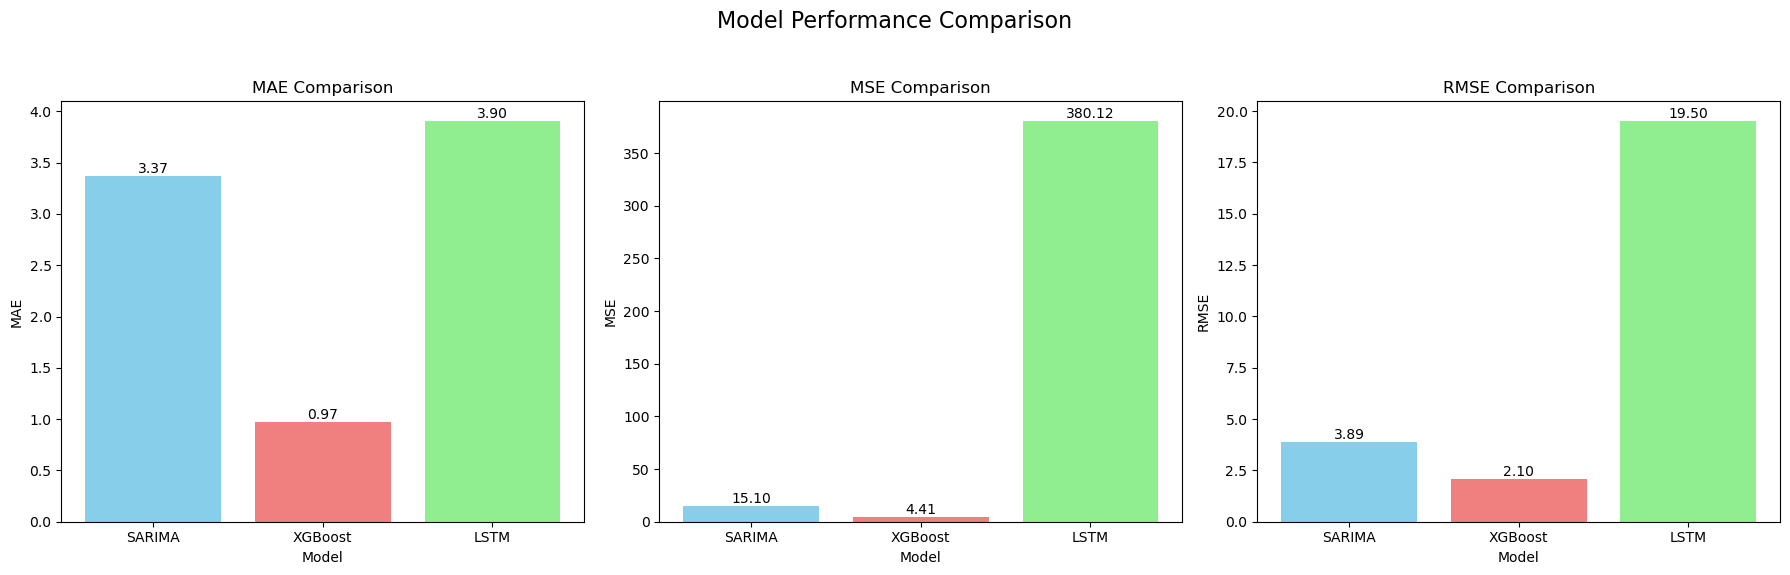


Comparison complete. Lower values for MAE, MSE, and RMSE generally indicate better model performance.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# SARIMA Metrics
sarima_mae = 3.3668
sarima_mse = 15.0955
sarima_rmse = np.sqrt(sarima_mse)

# XGBoost Metrics
xgboost_mae = 0.972
xgboost_mse = 4.4058
xgboost_rmse = np.sqrt(xgboost_mse)

# LSTM Metrics
lstm_mae = 3.9024
lstm_mse = 380.1222
lstm_rmse = np.sqrt(lstm_mse)

# --- Create a DataFrame for Comparison ---
print("--- Model Performance Metrics ---")

# Create a dictionary to hold the metrics
comparison_data = {
    'Model': ['SARIMA', 'XGBoost', 'LSTM'],
    'MAE': [sarima_mae, xgboost_mae, lstm_mae],
    'MSE': [sarima_mse, xgboost_mse, lstm_mse],
    'RMSE': [sarima_rmse, xgboost_rmse, lstm_rmse]
}

# Create a pandas DataFrame
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Model')

# Display the comparison table
# Format the numbers for better readability
print(comparison_df.to_string(float_format='{:.4f}'.format))

# --- Visualize the Comparison ---
print("\n--- Visualizing Model Comparison ---")

# Plotting the metrics using a bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
fig.suptitle('Model Performance Comparison', fontsize=16)

metrics_to_plot = ['MAE', 'MSE', 'RMSE']
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, metric in enumerate(metrics_to_plot):
    # Get data for the current metric
    metric_values = comparison_df[metric]
    models = metric_values.index

    # Create bar chart
    bars = axes[i].bar(models, metric_values, color=colors)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=0)

    # Add data labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom', ha='center')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\nComparison complete. Lower values for MAE, MSE, and RMSE generally indicate better model performance.")


Based on the evaluated metrics (MAE, MSE, and RMSE), the XGBoost model significantly outperforms both the SARIMA and LSTM models. It consistently achieves the lowest error values across all three metrics.

The SARIMA model performs better than the LSTM model but is not as effective as XGBoost according to these results.

The LSTM model appears to have performed poorly in this specific evaluation, exhibiting substantially higher errors (especially MSE and RMSE) compared to the other two models.


## 7. Conclusions and recommendations.

### 7.1 Conclusion

1. The XGBoost model clearly outperforms both the SARIMA and LSTM models. It consistently records the lowest error values across all three measures, indicating superior predictive accuracy and robustness. This suggests that XGBoost is particularly effective at capturing complex patterns in the data.

2. Effectiveness in Handling Volatility and Non-linearity: Stock market data, including the NSE, is inherently volatile and exhibits complex non-linear relationships. The strong performance of XGBoost indicates its effectiveness in modeling these characteristics. As a tree-based ensemble method, XGBoost is well-suited to capture complex interactions between features and handle non-linear patterns that simpler linear models like ARIMA may struggle with.

3. While LSTM is designed to handle sequential data and long-term dependencies effectively, its performance may have been impacted by challenges in adapting to the dataset’s structure. Additionally, recurrent neural networks like LSTM can sometimes struggle with short-term fluctuations in the NSE data which it faced potentially leading to larger errors in its predictive tasks. 

## 7.2 Recommendations.
1. Focus on high-volume stocks, as they typically provide better liquidity, allowing traders to enter and exit positions with minimal price slippage. High trading volume also indicates strong investor interest and activity, which often leads to more consistent and significant price movements. These characteristics make high-volume stocks particularly attractive for short-term trading strategies, where timely execution and frequent price action are essential for capturing quick gains.

2. Consider allocating a larger share of liquidity-sensitive investments to the Telecommunication and Banking sectors, as these typically exhibit higher trading volumes and market activity. This enhanced liquidity facilitates easier entry and exit from positions, reducing the likelihood of price slippage and potentially lowering transaction costs. Additionally, these sectors often include well-established companies with steady investor interest, making them more stable and predictable for managing large or frequently adjusted positions. This makes them ideal for strategies that require flexibility and quick response to market conditions.

3. Diversify your portfolio by including both high-volume sectors and emerging industries to achieve a balanced risk-return profile. High-volume sectors, such as Finance and Telecommunications, offer stability, liquidity, and consistent performance due to their established market presence and strong investor participation. In contrast, emerging sectors—like Technology, Renewable Energy, or Fintech—may exhibit higher volatility but present significant growth potential as they innovate and expand. This diversification strategy helps cushion against market downturns in any single sector while positioning the portfolio to benefit from future growth opportunities in rapidly evolving industries.

## 7.3 Next steps


1. Enhance Feature Engineering and Integration by 

Adding technical indicators like Bollinger Bands to enrich model input.

Incorporating volume-based metrics to reflect market liquidity.

Integrating fundamental and macroeconomic data like earnings reports and  sector performance.


2. Expanding Data Utilization and Continuous Retraining by

Defining an optimal historical data window for modeling.

Automating data ingestion and model retraining through pipelines.

Exploring  high-frequency data (hourly/intraday) for improved short-term forecasting.


3. Improving Model Evaluation and Performance Monitoring by 

Using advanced metrics like Sharpe Ratio (risk-adjusted return),Maximum Drawdown (worst peak-to-trough loss) and Hit Rate (accuracy of directional predictions).

Implementing drift detection to identify and react to market regime changes.


